## Loan Repayment Assessment in Banking
Submitted by - Gayathri Keerthivasagam
### Problem Statement:
Welcome to AI hackathon – Loan Repayment Assessment in Banking. You are required to build and train a model that identifies a customer will repay or default from the loan dataset.
#### Given Files: Train_loan_data.csv ,Test_loan_data.csv

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#libraries for resampling the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

#libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#libraries for cross validation,train test split,hyperparameter tuning
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif


#libraries for performance metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,RocCurveDisplay, log_loss

#libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
#Read the training dataset
train_df = pd.read_csv(r"D:\Gayathri\Bootcamp_DS_Upgrad\Hackathon\train_loan_data (1).csv")

## Understand the data

In [3]:
#Display the first 5 entries of the dataset
train_df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [4]:
#Shape of the dataset
train_df.shape

(80000, 28)

In [5]:
#Basic information about the features in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [6]:
#Descriptive statistics for numerical features in the dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,80000.0,76046.143138,69020.055377,0.00,46000.00,65000.00,90000.00,7141778.00
fico_range_high,80000.0,699.987975,31.734840,664.00,674.00,694.00,714.00,850.00
fico_range_low,80000.0,695.987813,31.734075,660.00,670.00,690.00,710.00,845.00
int_rate,80000.0,13.232898,4.771705,5.31,9.75,12.74,15.99,30.99
loan_amnt,80000.0,14403.867813,8703.826298,750.00,7925.00,12000.00,20000.00,40000.00
num_actv_bc_tl,76052.0,3.633790,2.262505,0.00,2.00,3.00,5.00,32.00
mort_acc,77229.0,1.674759,2.005104,0.00,0.00,1.00,3.00,32.00
tot_cur_bal,76052.0,141586.358991,159371.366632,0.00,29642.00,81000.50,211027.25,5172185.00
open_acc,80000.0,11.605675,5.483362,1.00,8.00,11.00,14.00,80.00
pub_rec,80000.0,0.216675,0.579854,0.00,0.00,0.00,0.00,24.00


In [7]:
#Descriptive statistics for categorical features in the dataset
train_df.describe(include=["O"]).T

,count,unique,top,freq
addr_state,80000,51,CA,11744
earliest_cr_line,80000,640,Sep-03,547
emp_length,75412,11,10+ years,26278
emp_title,74982,36661,Teacher,1278
grade,80000,7,B,23502
home_ownership,80000,6,MORTGAGE,39628
application_type,80000,2,Individual,78446
initial_list_status,80000,2,w,46745
purpose,80000,14,debt_consolidation,46418
sub_grade,80000,35,C1,4982


In [8]:
#columns in the dataset
train_df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

## Exploratory Data Analysis

#### Analysis of target variable 
1. loan_status - Status of the loan

In [9]:
#Counts for 'loan status' column
train_df['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

There are a greater number of borrowers who have paid their loans compared to those who have defaulted

In [10]:
#calculates the percentage distribution of the 'loan_status' column
train_df['loan_status'].value_counts(normalize=True) *100

loan_status
Paid         80.0375
Defaulted    19.9625
Name: proportion, dtype: float64

##### Thus, we can observe an imbalance in the dataset, with approximately 80% of borrowers repaying their loans and around 20% defaulting.The visualization for the same is presented below #####

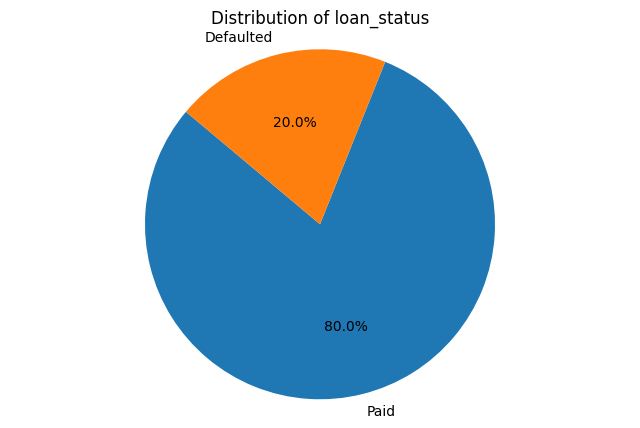

In [11]:
#Plot the target column values and its count.
#Calculate value counts of the target column
status_counts = train_df['loan_status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,5))
plt.pie(status_counts, labels=status_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of loan_status')
plt.axis('equal')  
# Save the plot as PNG file
plt.savefig('Distribution_of_Target_Class.png') 
plt.show()

##### 2. addr_state -  
The state provided by the borrower in the loan application

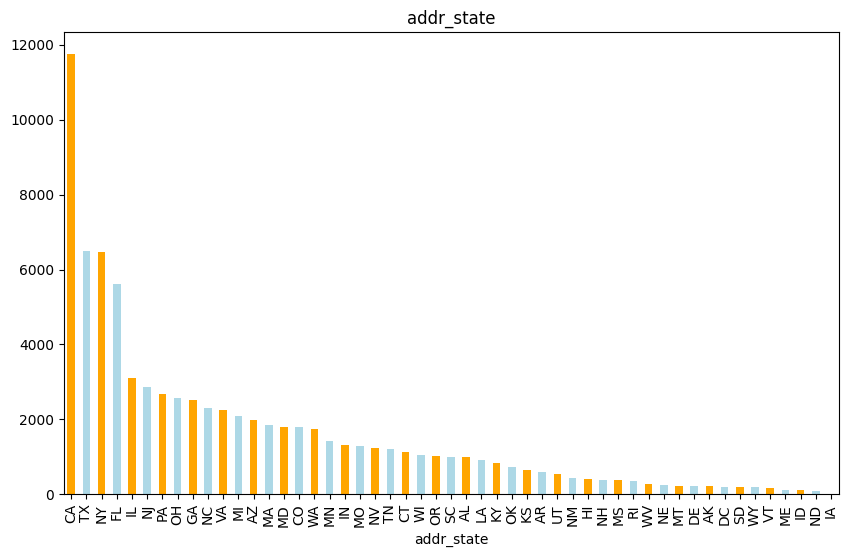

In [12]:
#Generates a bar plot showing the frequency distribution of states
plt.figure(figsize=(10,6))
plt.title("addr_state")
train_df["addr_state"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])
plt.show()

##### The graph indicates a significant presence of borrowers from the state of 'CA' #####

##### 3. annual_inc 
The self-reported annual income provided by the borrower during registration.

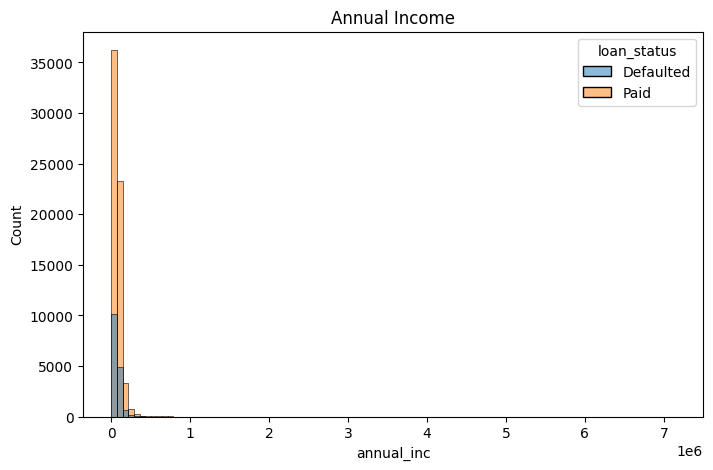

In [13]:
#Generates a histogram of annual income
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='annual_inc', hue='loan_status', bins=100)
plt.title('Annual Income')
plt.show()

##### Although the annual income ranges from 0 to approximately 70 lakhs, a predominant number of borrowers fall below the 1 lakh mark

##### 4. earliest_cr_line - 
The month the borrower's earliest reported credit line was opened

In [14]:
#Displays the first few entries of the 'earliest_cr_line' column
train_df['earliest_cr_line'].head()

0    Jul-97
1    Apr-87
2    Aug-07
3    Sep-80
4    Jul-99
Name: earliest_cr_line, dtype: object

##### We can observe that earliest_cr_line includes both month and year data. To enhance visualization, we'll divide it into separate month and year components as follows:

In [15]:
# Split the values in the column by '-'
# Create a copy of training data as we don't want to change the original dataset
new_train_df = train_df.copy()
new_train_df[['month', 'year']] = new_train_df['earliest_cr_line'].str.split('-', expand=True)

Thus, month and year are separated from 'earliest_cr_line' column and stored in the newly created features 'month' and 'year' for better interpretation.

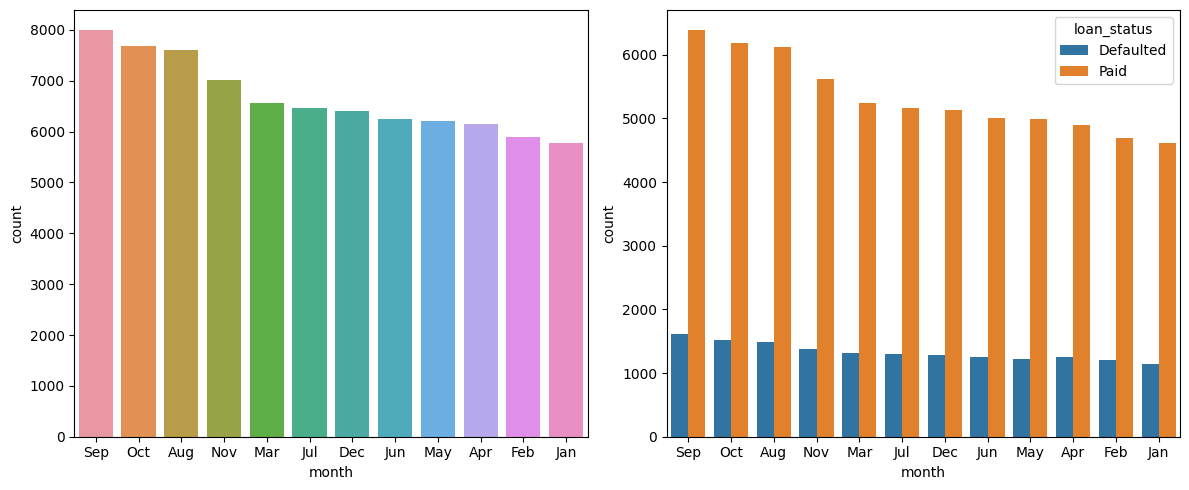

In [16]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first countplot on the first axis
# Sort the values of 'month' column
sorted_categories = new_train_df['month'].value_counts().index
sns.countplot(data=new_train_df, x='month',order =sorted_categories, ax=axes[0])

# Plot the second countplot on the second axis
sns.countplot(data=new_train_df, x='month',order =sorted_categories, hue='loan_status', ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


##### The graph above illustrates a relatively consistent number of borrowers across all months. However, September stands out as the month with the highest number of borrowers.

In [17]:
#To facilitate better visualization and interpretation, we'll group the years into ranges as follows:
#Convert 'year' column to integers
new_train_df['year'] = new_train_df['year'].astype(int)

# Define conditions and choices for years
conditions_year = [
    ((new_train_df['year'] >= 0) & (new_train_df['year'] <= 10)),
    ((new_train_df['year'] > 10) & (new_train_df['year'] <= 20)),
    ((new_train_df['year'] > 20) & (new_train_df['year'] <= 24)),
    ((new_train_df['year'] > 24) & (new_train_df['year'] < 80)),
    ((new_train_df['year'] >= 80) & (new_train_df['year'] < 90)),
    (new_train_df['year'] >= 90) 
]

choices_year = ['2000-2010','2010-2020', '2020-present', 'before 1980','1980 -1990','1990-2000']

# Create the 'year_category' column based on conditions
new_train_df['year_category'] = np.select(conditions_year, choices_year, default='unknown')

Thus, to enhance interpretability, the years are categorized with intervals of 10 years.The visualization for the same is done below.

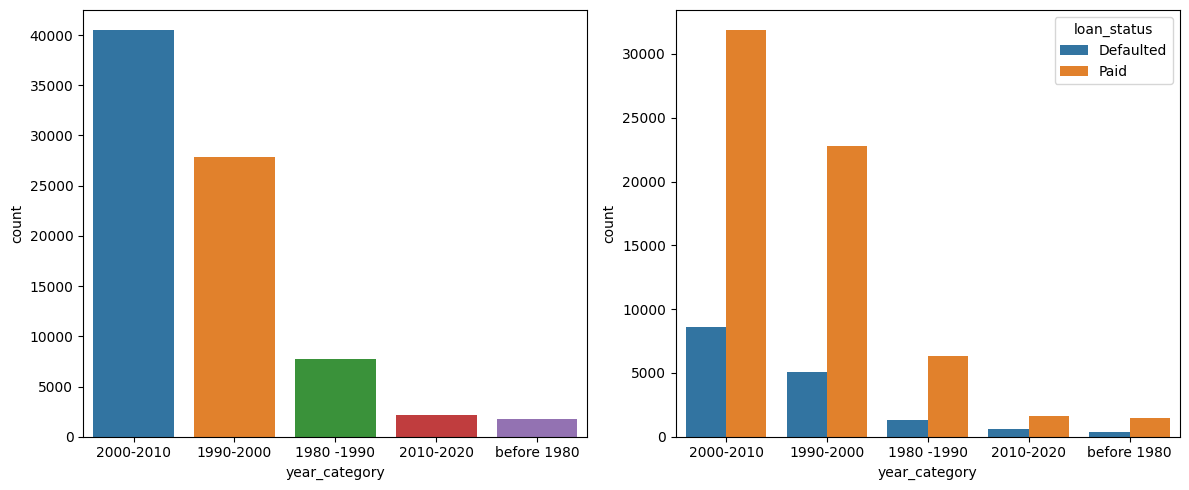

In [18]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first countplot on the first axis
# Sort the values of year_category column
sorted_categories = new_train_df['year_category'].value_counts().index
sns.countplot(data=new_train_df, x='year_category',order=sorted_categories,ax=axes[0])

# Plot the second countplot on the second axis
sns.countplot(data=new_train_df, x='year_category', hue='loan_status',order=sorted_categories, ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


##### The graphs above indicate a higher number of borrowers in the period between 2000 and 2010

##### 5. emp_length -
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

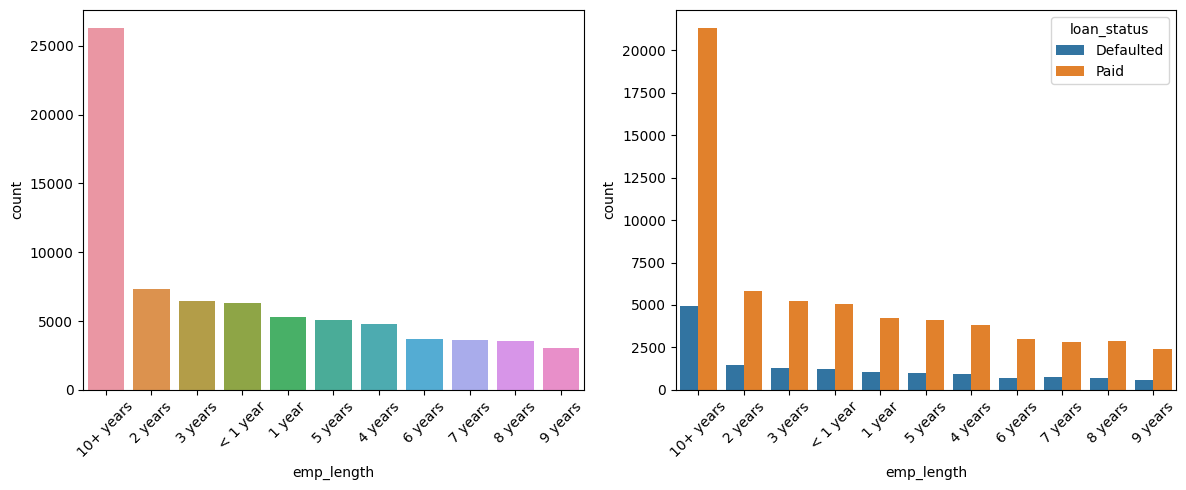

In [19]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot the first countplot on the first axis
# Sort the values of emp_length column
sorted_categories = new_train_df['emp_length'].value_counts().index
sns.countplot(data=train_df, x='emp_length',order=sorted_categories,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=45)

# Plot the second countplot on the second axis
sns.countplot(data=train_df, x='emp_length', hue='loan_status',order=sorted_categories, ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### There is a higher number of borrowers with employment lengths exceeding 10 years.

##### 6.emp_title -
The job title supplied by the Borrower when applying for the loan.

In [20]:
new_train_df['emp_title'].nunique()

36661

We could find there are around 36661 job titles supplied by the borrower. We will convert the titles to lower case and check further.

In [21]:
new_train_df['emp_title'] = new_train_df['emp_title'].str.lower()
new_train_df['emp_title'].nunique()

32558

After converting to lowercase, we can observe a decrease in the count of job titles. Due to the large number of unique job titles, visualizing all of them in a graph would be cumbersome. Therefore, we will focus on visualizing only the top 15 job titles provided by the borrowers.

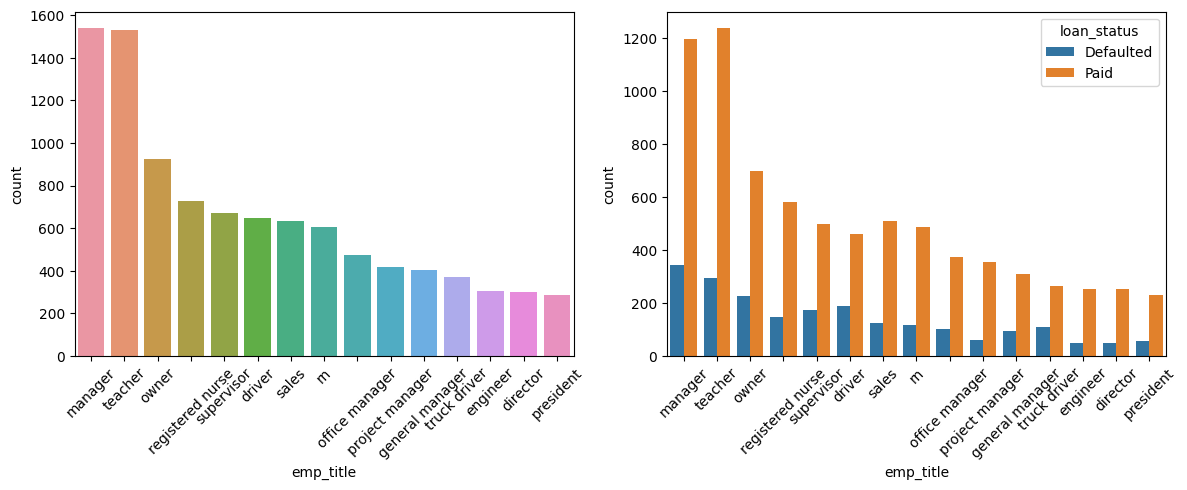

In [22]:
# Determine the top values in the column you're interested in
top_values = new_train_df['emp_title'].value_counts().nlargest(15).index
top_values

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=new_train_df,x='emp_title',order=top_values,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=45)

sns.countplot(data=new_train_df,x='emp_title',hue='loan_status',order=top_values,ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### The graph above displays the top 15 employment titles of borrowers, with 'manager' ranking the highest.

##### 7.fico_range_high -
The upper boundary range the borrower’s FICO at loan origination belongs to.

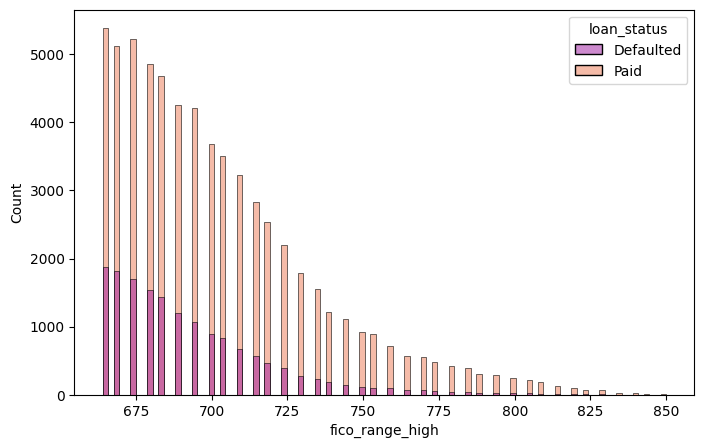

In [23]:
#Histogram plot showing the distribution of FICO high range scores
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='fico_range_high',hue='loan_status',palette ='plasma')
plt.show()

#### The FICO range high of the borrowers are gradually decreases from 650 to 850.

##### 8.fico_range_low -
The lower boundary range the borrower’s FICO at loan origination belongs to.

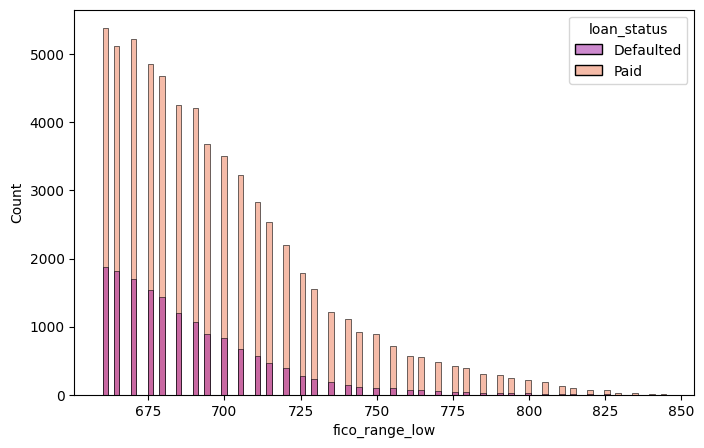

In [24]:
#Histogram plot showing the distribution of FICO low range scores
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='fico_range_low',hue='loan_status',palette ='plasma')
plt.show()

#### The FICO range low of the borrowers are gradually decreases from 650 to 850.

##### 9.grade -
LC assigned loan grade

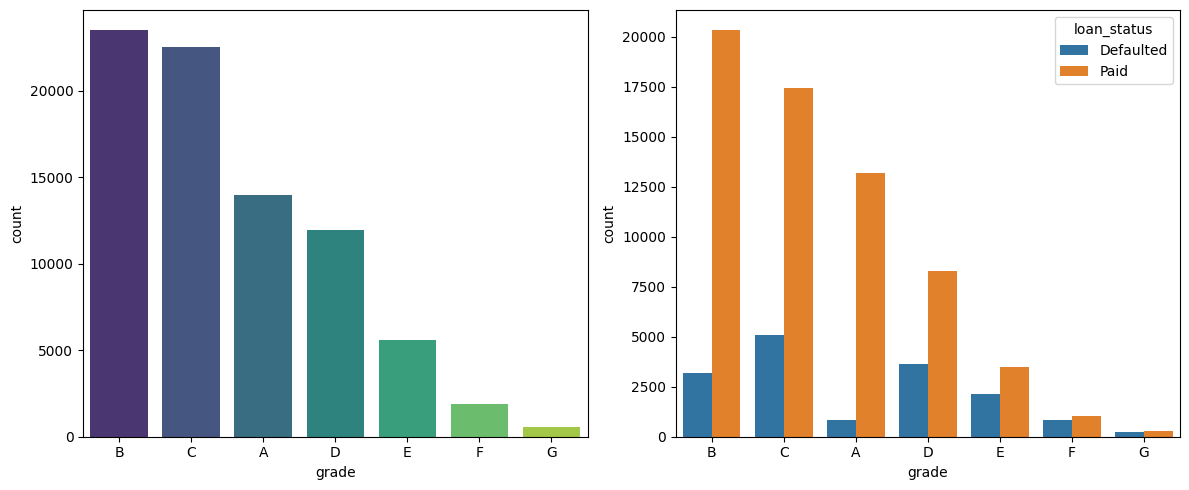

In [25]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['grade'].value_counts().index
sns.countplot(data=train_df,x='grade',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='grade',hue='loan_status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The graph highlights that Grade B is the most frequent grade, yet Grade C exhibits a higher number of defaulters compared to Grade B, which is a significant observation.

##### 10.home_ownership  -
The home ownership status provided by the borrower during registration.

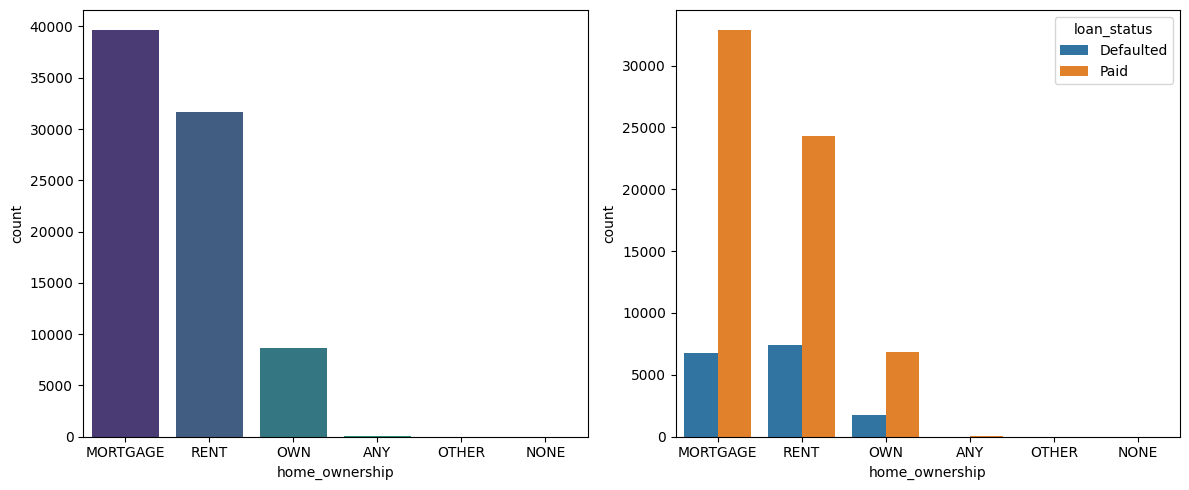

In [26]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['home_ownership'].value_counts().index
sns.countplot(data=train_df,x='home_ownership',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='home_ownership',hue='loan_status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Despite the majority of borrowers owning a home through a mortgage, there appears to be a higher number of defaulters in the rent category compared to the mortgage category.The graph also indicates the presence of additional values such as 'any' and 'none' in the features. Further feature engineering will be conducted on this feature as we progress in the feature engineering section. 

##### 11.application_type -
Indicates whether the loan is an individual application or a joint application with two co-borrowers

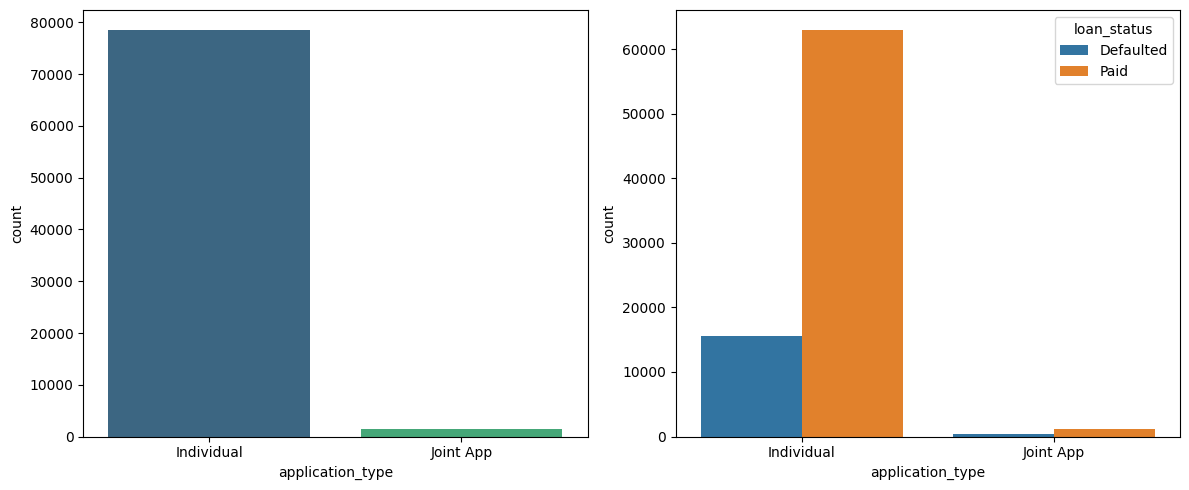

In [27]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['application_type'].value_counts().index
sns.countplot(data=train_df,x='application_type',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='application_type',hue='loan_status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The loan from the individual  is more than the joint application with two co-borrowers

##### 12. initial_list_status -
The initial listing status of the loan. Possible values are – W, F

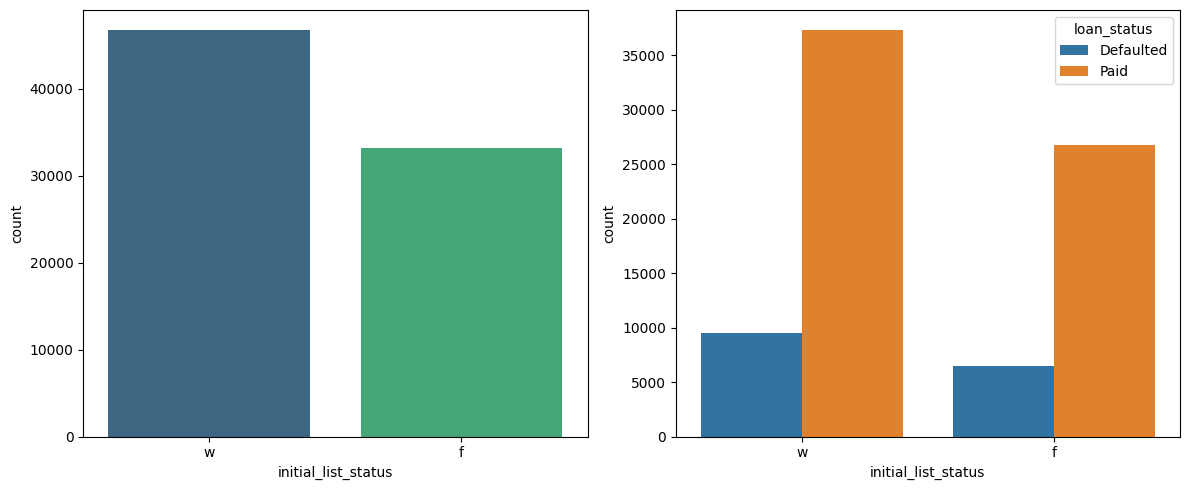

In [28]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['initial_list_status'].value_counts().index
sns.countplot(data=train_df,x='initial_list_status',ax=axes[0],order=sorted_counts,palette='viridis')
sns.countplot(data=train_df,x='initial_list_status',hue='loan_status',order=sorted_counts,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### There are a higher number of borrowers with the initial_list_status 'W'.

##### 13. int_rate -
Interest Rate on the loan


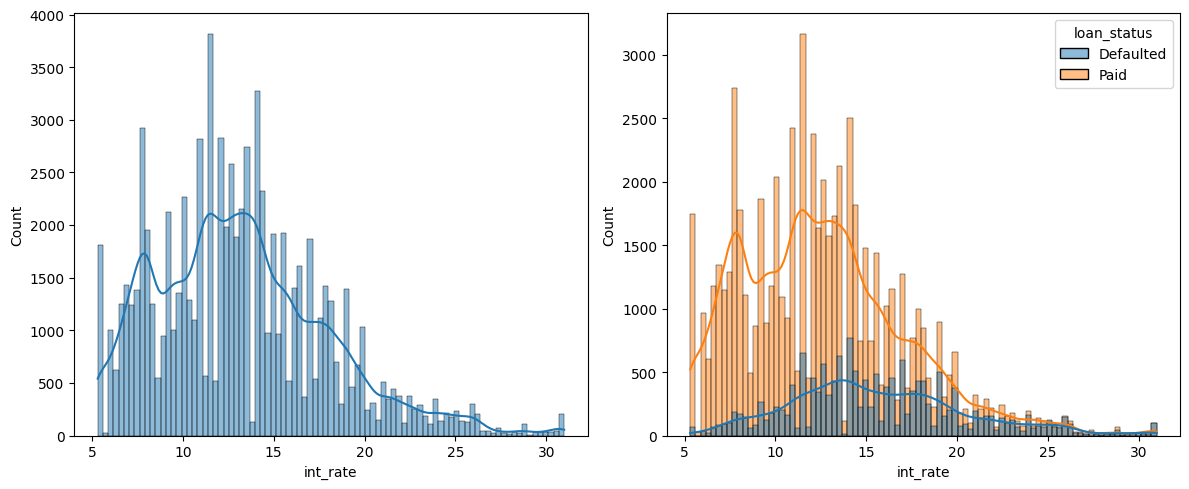

In [29]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='int_rate',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='int_rate',hue='loan_status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The graph illustrates an increase in defaults as the interest rate of the loan rises.

##### 14. loan_amnt -
The listed amount of the loan applied for by the borrower.

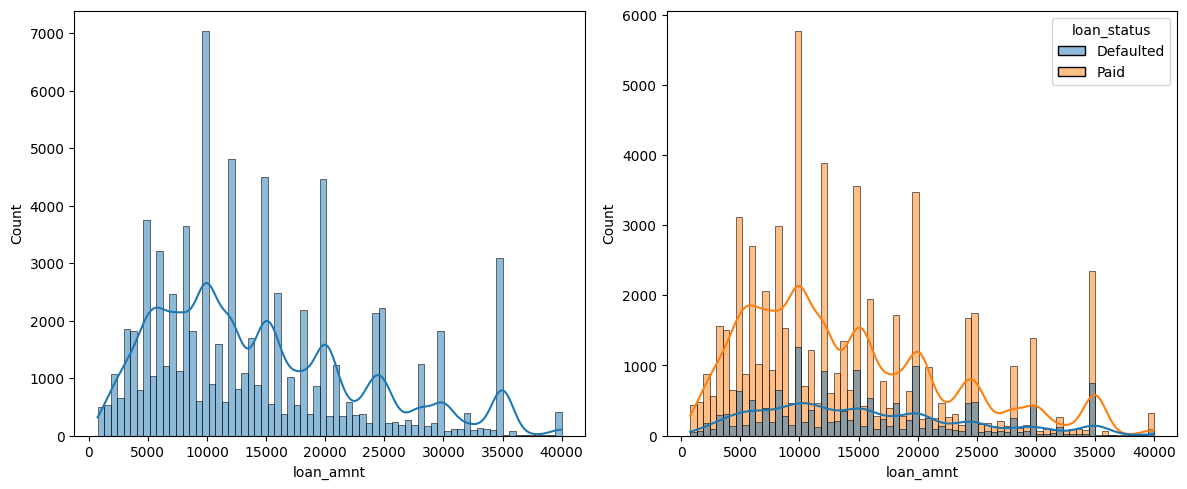

In [30]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='loan_amnt',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='loan_amnt',hue='loan_status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

The graph doesn't provide any clear insights regarding the relationship between loan amount and the defaulters.

##### 15. num_actv_bc_tl -
Number of currently active bankcard accounts.


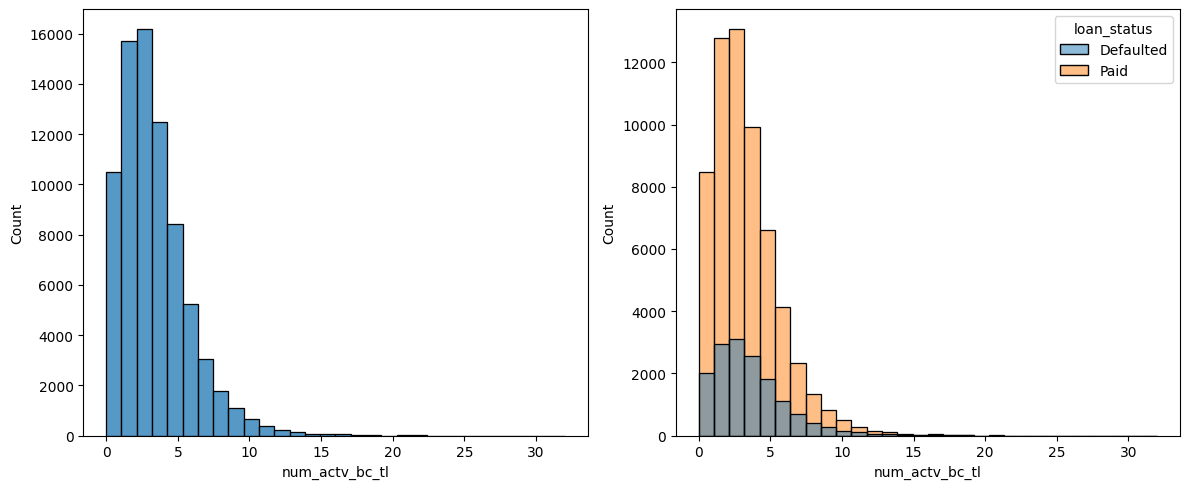

In [31]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='num_actv_bc_tl',bins=30,ax=axes[0])
sns.histplot(data=train_df,x='num_actv_bc_tl',hue='loan_status',bins=30,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The majority of borrowers have fewer than 10 active bankcard accounts

##### 16.mort_acc   -
Number of mortgage accounts.

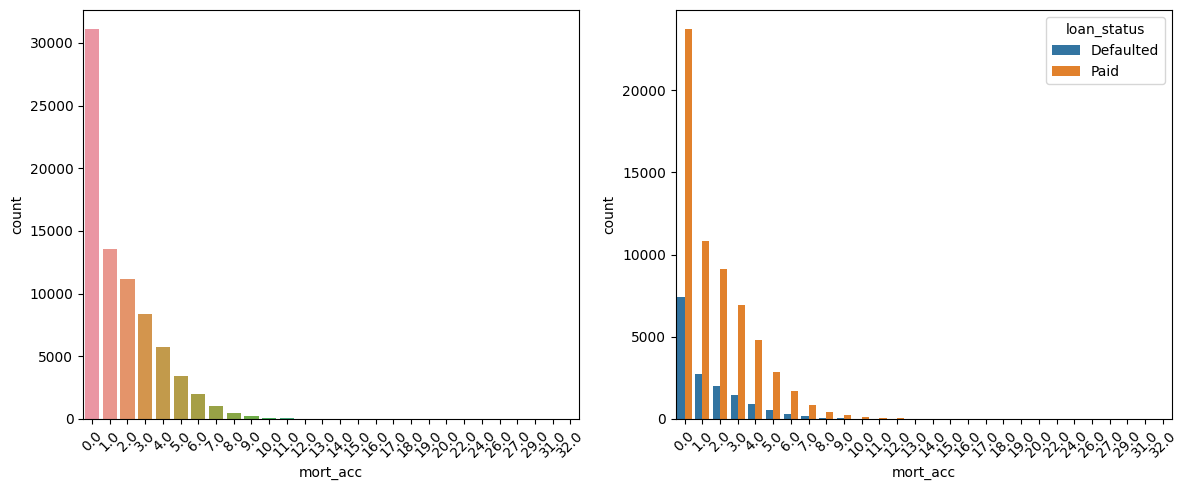

In [32]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=train_df,x='mort_acc',ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=45)
sns.countplot(data=train_df,x='mort_acc',hue='loan_status',ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Most of the borrowers have the mortgage accounts less than 2

##### 17.tot_cur_bal -
Total current balance of all accounts

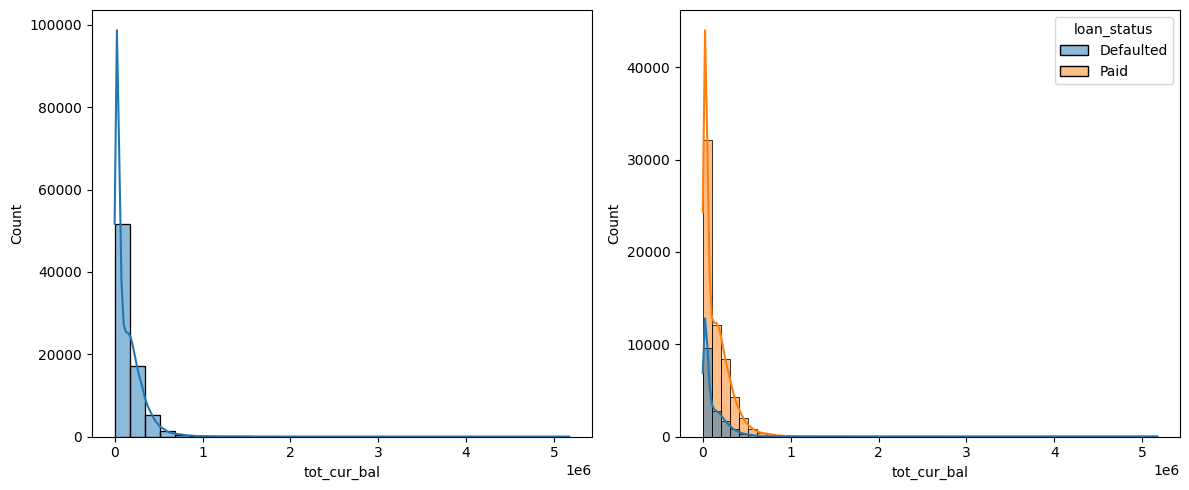

In [33]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='tot_cur_bal',kde=True,bins=30,ax=axes[0])
sns.histplot(data=train_df,x='tot_cur_bal',hue='loan_status',kde=True,bins=50,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Most of the borrowers have the total current balance lesser than 1lakh.

##### 18.open_acc - 
The number of open credit lines in the borrower's credit file.

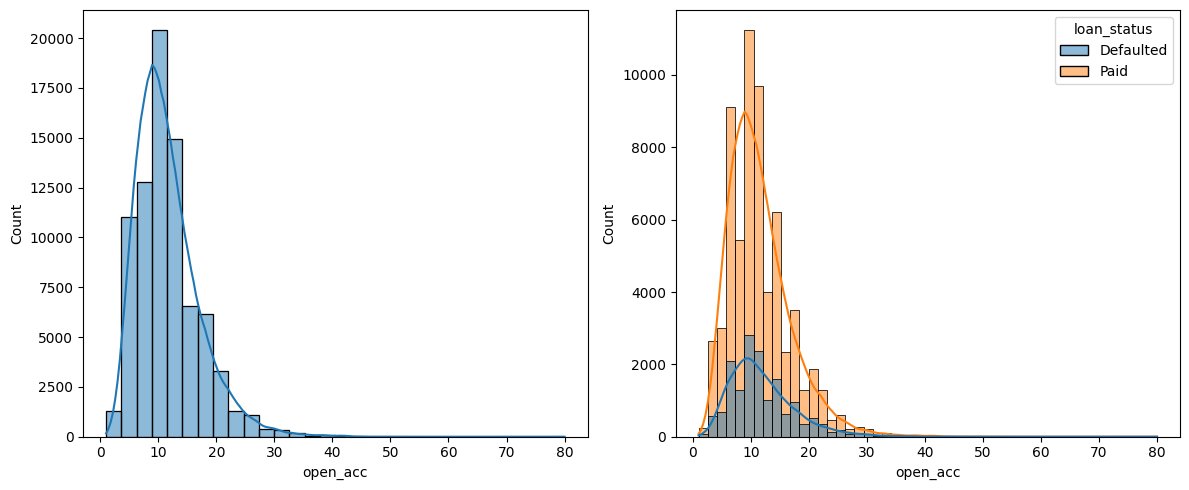

In [34]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='open_acc',kde=True,bins=30,ax=axes[0])
sns.histplot(data=train_df,x='open_acc',hue='loan_status',kde=True,bins=50,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The number of open credit lines of the borrowers ranges from 0 to 80. However most of them have lesser than 30.

##### 19. pub_rec -
Number of derogatory public records

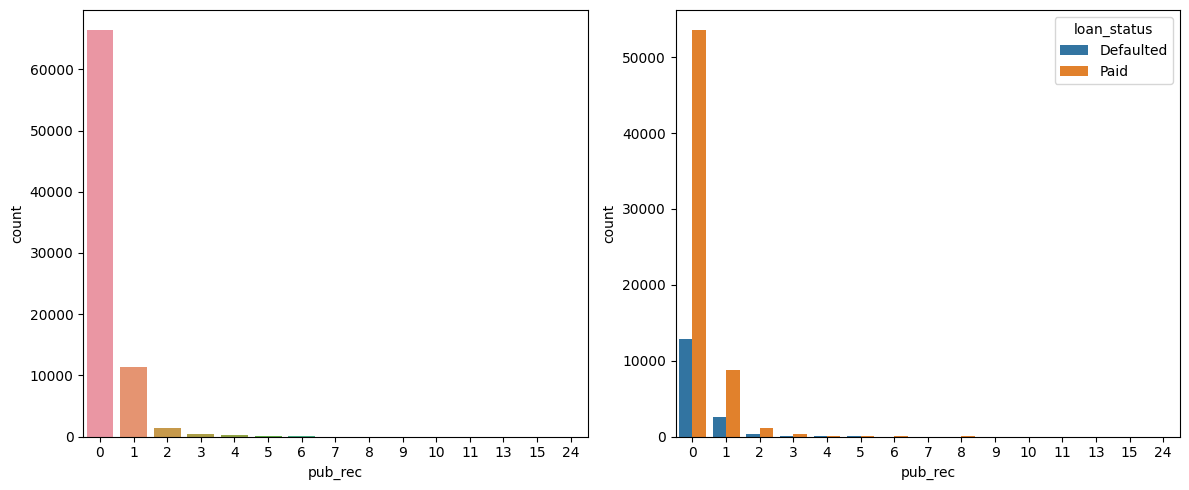

In [35]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=train_df,x='pub_rec',ax=axes[0])
sns.countplot(data=train_df,x='pub_rec',hue='loan_status',ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Most borrowers do not have derogatory public records. 

##### 20. pub_rec_bankruptcies  
Number of public record bankruptcies.

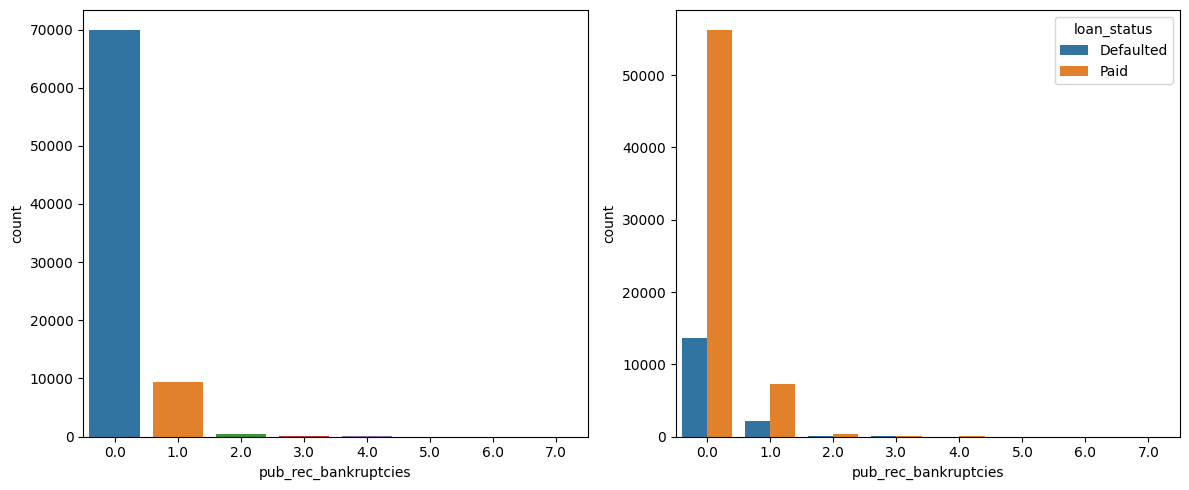

In [36]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=train_df,x='pub_rec_bankruptcies',ax=axes[0])
sns.countplot(data=train_df,x='pub_rec_bankruptcies',hue='loan_status',ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Most borrowers do not have public record bankruptcies 

##### 21.purpose -  
A category provided by the borrower for the loan request.

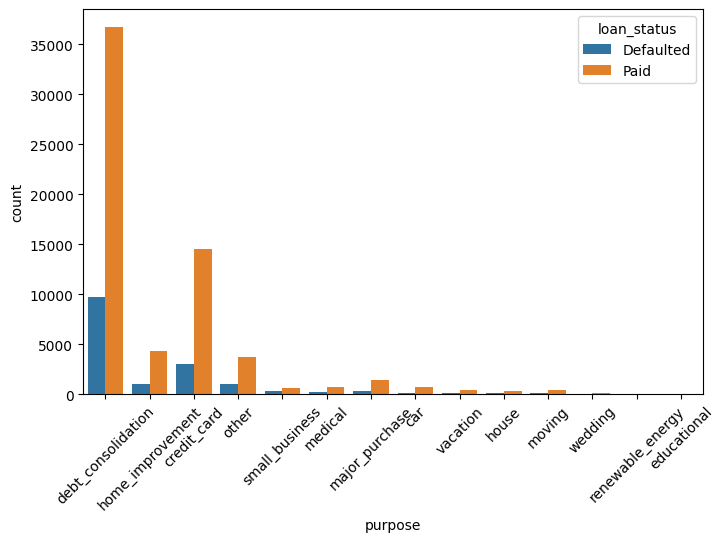

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='purpose',hue='loan_status')
plt.xticks(rotation=45) 
plt.show()

#### The primary purpose for borrowers to obtain loans is 'debt consolidation'.

##### 22.revol_bal -
Total credit revolving balance

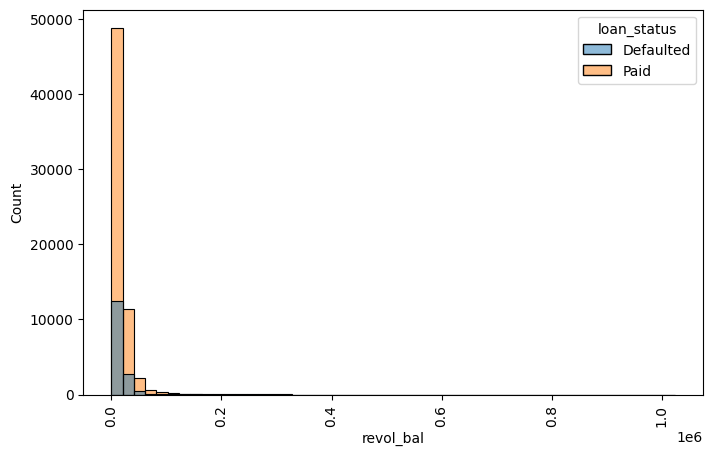

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='revol_bal',hue='loan_status',bins=50)
plt.xticks(rotation=90)
plt.show()

75% of the borrowers are having the credit revolving balance lesser than 20K.

##### 23.revol_util - 
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

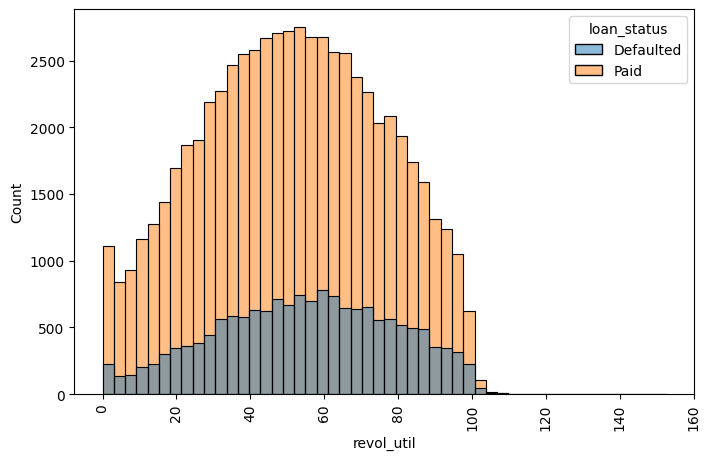

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df,x='revol_util',hue='loan_status',bins=50)
plt.xticks(rotation=90)
plt.show()

The Revolving line utilization rate ranges from 0 to 100

##### 24.sub_grade -    
LC assigned loan subgrade

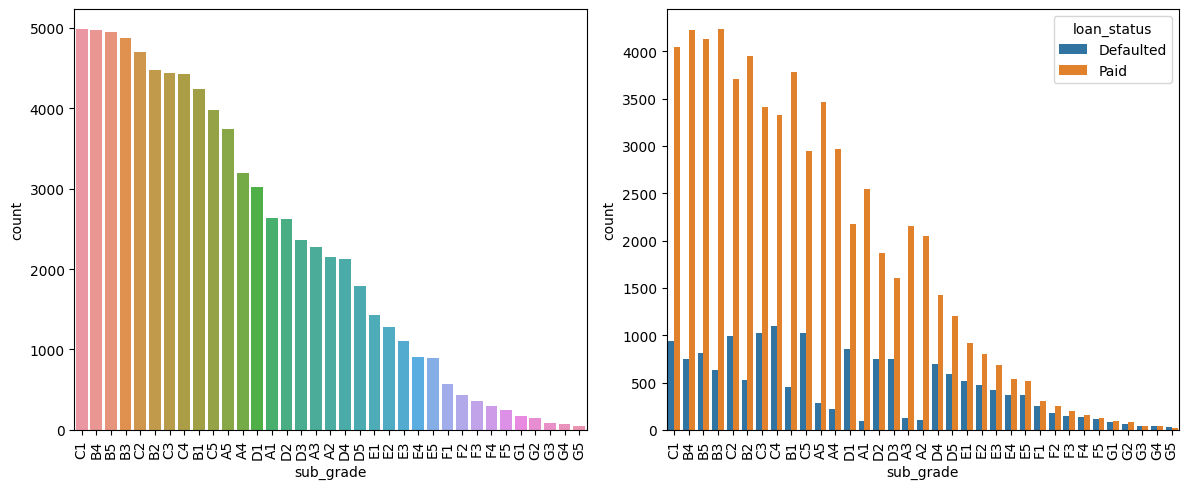

In [40]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['sub_grade'].value_counts().index
sns.countplot(data=train_df,x='sub_grade',order=sorted_counts,ax=axes[0])
sns.countplot(data=train_df,x='sub_grade',hue='loan_status',order=sorted_counts,ax=axes[1])
# Rotate x-tick labels for both subplots
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### The C1 subgrade has a higher number of borrowers than other Grades.However there are more defaulters in Grade C4.

##### 25.term - 
The number of payments on the loan. Values are in months and can be either 36 or 60.

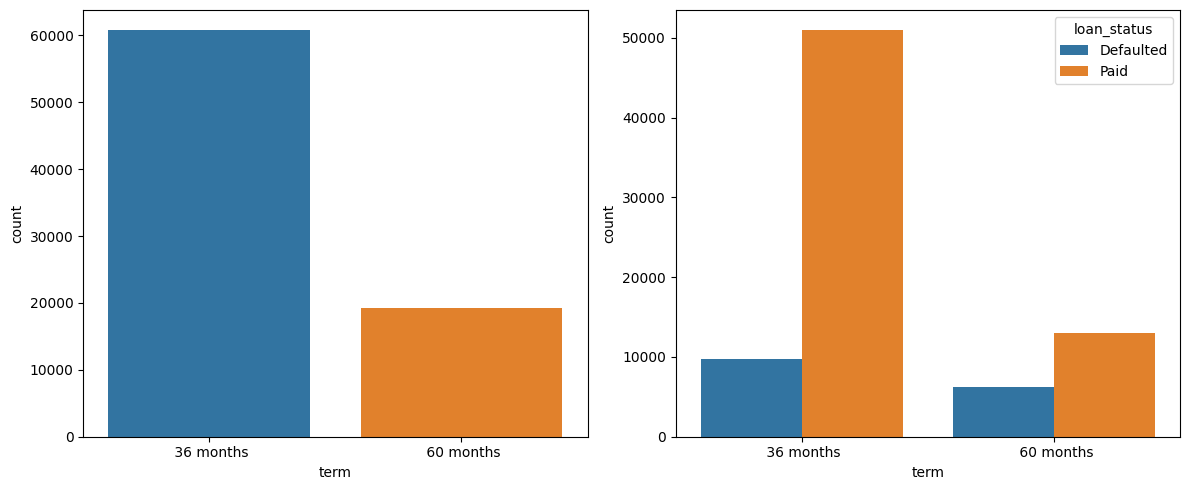

In [41]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['term'].value_counts().index
sns.countplot(data=train_df,x='term',order=sorted_counts,ax=axes[0])
sns.countplot(data=train_df,x='term',hue='loan_status',order=sorted_counts,ax=axes[1])


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

##### Most of the borrowers are having the loan term for 36 months.

##### 26.title -
The loan title provided by the borrower

In [42]:
print(train_df['title'].nunique())

5348


We could find there 5348 loan title provided by the borrower.We will convert the titles to lower case and check further.

In [43]:
new_train_df['title'] = new_train_df['title'].str.lower()
print(new_train_df['title'].nunique())

4598


After converting to lowercase, we can observe a decrease in the count of loan titles. Due to the large number of unique loan titles, visualizing all of them in a graph would be cumbersome. Therefore, we will focus on visualizing only the top 15 loan titles provided by the borrowers.

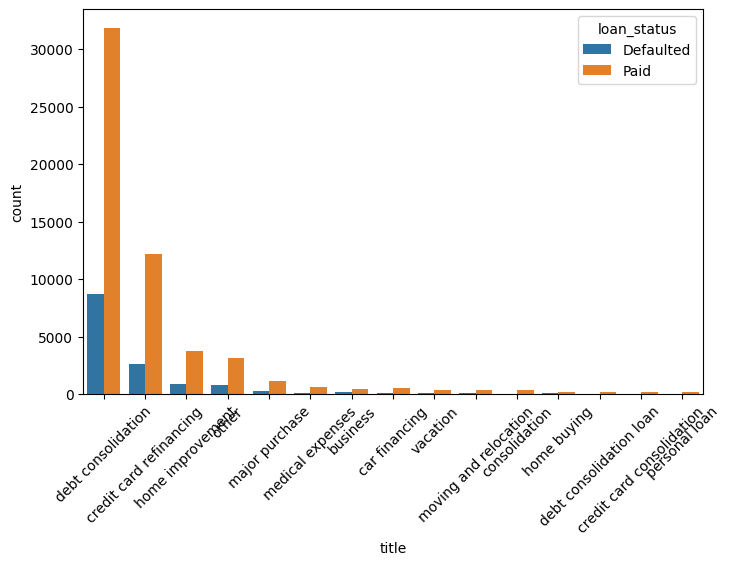

In [44]:
# Determine the top values in the column you're interested in
top_values = new_train_df['title'].value_counts().nlargest(15).index

plt.figure(figsize=(8,5))
sns.countplot(data=new_train_df,x='title',hue='loan_status',order=top_values)
plt.xticks(rotation=45)
plt.show()

##### "Debt consolidation" top the list in the loan title

##### 27.total_acc -
The total number of credit lines currently in the borrower's credit file.

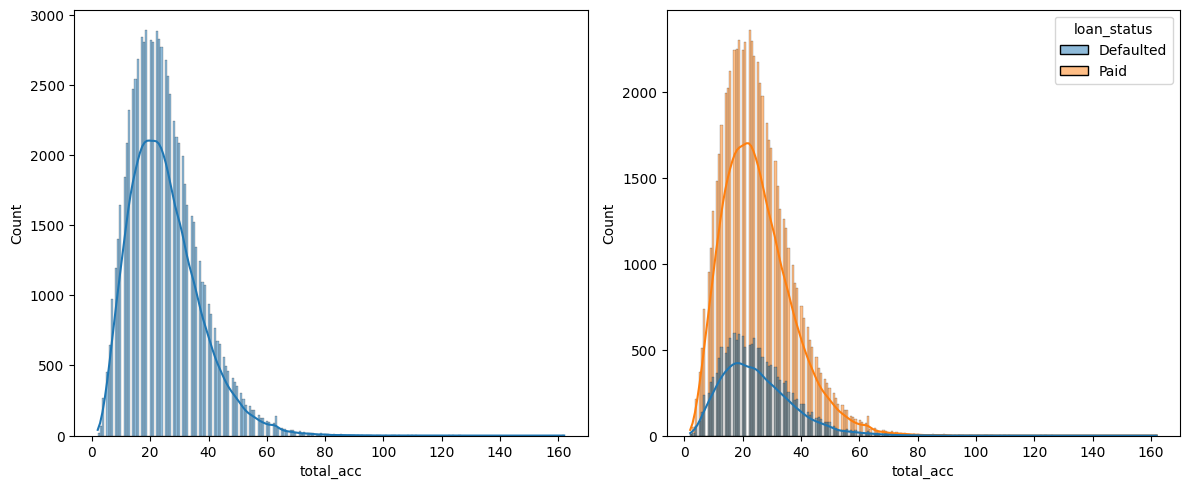

In [45]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=train_df,x='total_acc',kde=True,ax=axes[0])
sns.histplot(data=train_df,x='total_acc',hue='loan_status',kde=True,ax=axes[1])

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

Most of the borrowers have the total number of credit lines currently in the credit file ranges from 0 to 80

##### 28.verification_status -
Indicates if income was verified by LC, not verified, or if the income source was verified

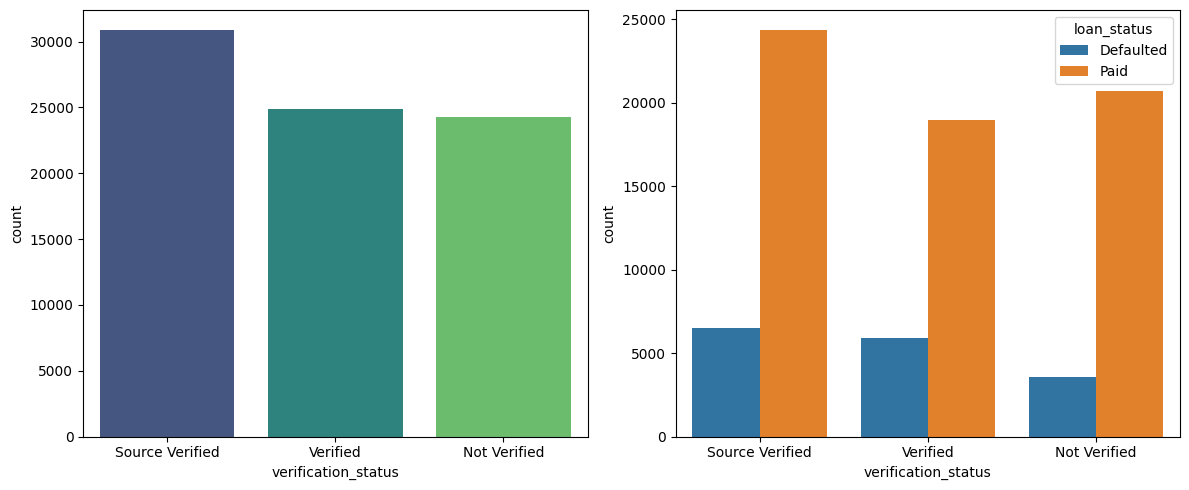

In [46]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sorted_counts = train_df['verification_status'].value_counts().index
sns.countplot(data=train_df,x='verification_status',order=sorted_counts,ax=axes[0],palette='viridis')
sns.countplot(data=train_df,x='verification_status',hue='loan_status',order=sorted_counts,ax=axes[1])


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

The verification status feature does not exhibit significant differences in loan status.

### Missing Value Treatment

In [47]:
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
print(missing_percentage)

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64


we could observe null values in the emp_length,emp_title,num_actv_bc_tl,mort_acc,tot_cur_bal,pub_rec_bankruptcies,revol_util and title

In [48]:
# Drop rows with missing values in specified columns
new_train_df.dropna(subset = ['pub_rec_bankruptcies', 'revol_util'],axis=0,inplace=True)

As there are very less percentage of null values in pub_rec_bankruptcies and revol_util , dropped the null values.

In [49]:
new_train_df['title'] = new_train_df['title'].fillna(new_train_df['purpose'])

Given the close relationship between the title and purpose features, both indicating the category of the loan request,filled the null values in the title column with the corresponding values from the purpose column

In [50]:
#Use mode to fill the null values of the employment title
mode_value = new_train_df['emp_title'].mode()[0]
new_train_df['emp_title'] = new_train_df['emp_title'].fillna(mode_value)

In [51]:
#identify the numerical columns
num_cols = new_train_df._get_numeric_data().columns
num_cols
# Compute the correlation 
new_train_df[num_cols].corr()['mort_acc'].drop('mort_acc').sort_values(ascending=False)

# Mean imputation by group
# Group by 'tot_cur_bal' and calculate the mean of 'mort_acc' for each group
mort_acc_mean = new_train_df.groupby('tot_cur_bal')['mort_acc'].mean()
#Create a dictionary mapping 'tot_cur_bal' to the corresponding mean of 'mort_acc'
mort_acc_mean_dict = mort_acc_mean.to_dict()
# Fill null values in 'mort_acc' with the mean value based on 'tot_cur_bal'
new_train_df['mort_acc'] = new_train_df['mort_acc'].fillna(new_train_df['tot_cur_bal'].map(mort_acc_mean_dict))

In the above code, examined the correlation of the 'mort_acc' feature with other features. 
Identified 'tot_cur_bal' as the highly correlated field with 'mort_acc'. 
Subsequently, filled the null values in 'mort_acc' with the mean of 'mort_acc' grouped by 'tot_cur_bal'

In [52]:
# Compute the correlation 
new_train_df[num_cols].corr()['num_actv_bc_tl'].drop('num_actv_bc_tl').sort_values(ascending=False)

# Mode imputation by group
# Group by 'open_acc' and calculate the median of 'num_actv_bc_tl' for each group
num_actv_mode = new_train_df.groupby('open_acc')['num_actv_bc_tl'].median()
#Create a dictionary mapping 'open_acc' to the corresponding median of 'num_actv_bc_tl'
num_actv_mode_dict = num_actv_mode.to_dict()
# Fill null values in 'num_actv_bc_tl' with the median value based on 'open_acc'
new_train_df['num_actv_bc_tl'] = new_train_df['num_actv_bc_tl'].fillna(new_train_df['open_acc'].map(mort_acc_mean_dict))


In the above code,first examined the correlation of the 'num_actv_bc_tl' feature with other features. 
Identified 'open_acc' as the highly correlated field with 'num_actv_bc_tl'. 
Subsequently, filled the null values in 'num_actv_bc_tl' with the median of 'num_actv_bc_tl' grouped by 'open_acc'

In [53]:
# Compute the correlation 
new_train_df[num_cols].corr()['tot_cur_bal'].drop('tot_cur_bal').sort_values(ascending=False)

# Calculate the median 'tot_cur_bal' for each group of 'mort_acc'
tot_cur_bal_median = new_train_df.groupby('mort_acc')['tot_cur_bal'].median()
# Create a dictionary from the median values
tot_cur_bal_median_dict = tot_cur_bal_median.to_dict()

# Fill null values in 'tot_cur_bal' column based on 'mort_acc'
new_train_df['tot_cur_bal'] = new_train_df['tot_cur_bal'].fillna(new_train_df['mort_acc'].map(tot_cur_bal_median_dict))

In the above code,first examined the correlation of the 'tot_cur_bal' feature with other features. 
Identified 'mort_acc' as the highly correlated field with 'tot_cur_bal'. 
Subsequently, filled the null values in 'tot_cur_bal' with the median of 'tot_cur_bal' grouped by 'tot_cur_bal'

In [54]:
#Imputed the null values in the emp_length with the mode.
# Calculate the mode of 'emp_length'
emp_len_mode = new_train_df['emp_length'].mode()[0]

# Fill null values in 'emp_length' column with its mode
new_train_df['emp_length'].fillna(emp_len_mode, inplace=True)

In [55]:
missing_percentage = new_train_df.isnull().sum() / len(train_df) * 100
print(missing_percentage)

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              0.00000
emp_title               0.00000
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          2.37625
mort_acc                3.41875
tot_cur_bal             3.41875
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.00000
purpose                 0.00000
revol_bal               0.00000
revol_util              0.00000
sub_grade               0.00000
term                    0.00000
title                   0.00000
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
month                   0.00000
year                    0.00000
year_category           0.00000
dtype: f

In [56]:
#Could still find the null values in the num_actv_bc_tl,mort_acc,tot_cur_bal features.
#So imputing with the median values
median1 = new_train_df['num_actv_bc_tl'].median()
new_train_df['num_actv_bc_tl'].fillna(median1, inplace=True)
median2 = new_train_df['mort_acc'].median()
new_train_df['mort_acc'].fillna(median2, inplace=True)
median3 = new_train_df['tot_cur_bal'].median()
new_train_df['tot_cur_bal'].fillna(median3, inplace=True)

In [57]:
missing_percentage = new_train_df.isnull().sum() / len(new_train_df) * 100
print(missing_percentage)

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
emp_length              0.0
emp_title               0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
title                   0.0
total_acc               0.0
verification_status     0.0
loan_status             0.0
month                   0.0
year                    0.0
year_category           0.0
dtype: float64


Thus, all null values are successfully treated

In [58]:
#checking for duplicates
num_duplicates = new_train_df.duplicated().sum()
num_duplicates

0

No duplicates found in the dataset

## Feature Engineering

In [59]:
#Convert the target column 'paid' as 0 and 'defaulter' as 1
status_mapping = {'Paid': 0, 'Defaulted': 1}
new_train_df['loan_status'] = new_train_df['loan_status'].map(status_mapping)

In [60]:
new_train_df['loan_status'].value_counts()

loan_status
0    63963
1    15953
Name: count, dtype: int64

In [61]:
#identify the numerical columns
num_cols = new_train_df._get_numeric_data().columns
num_cols

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status', 'year'],
      dtype='object')

### Correlation Matrix

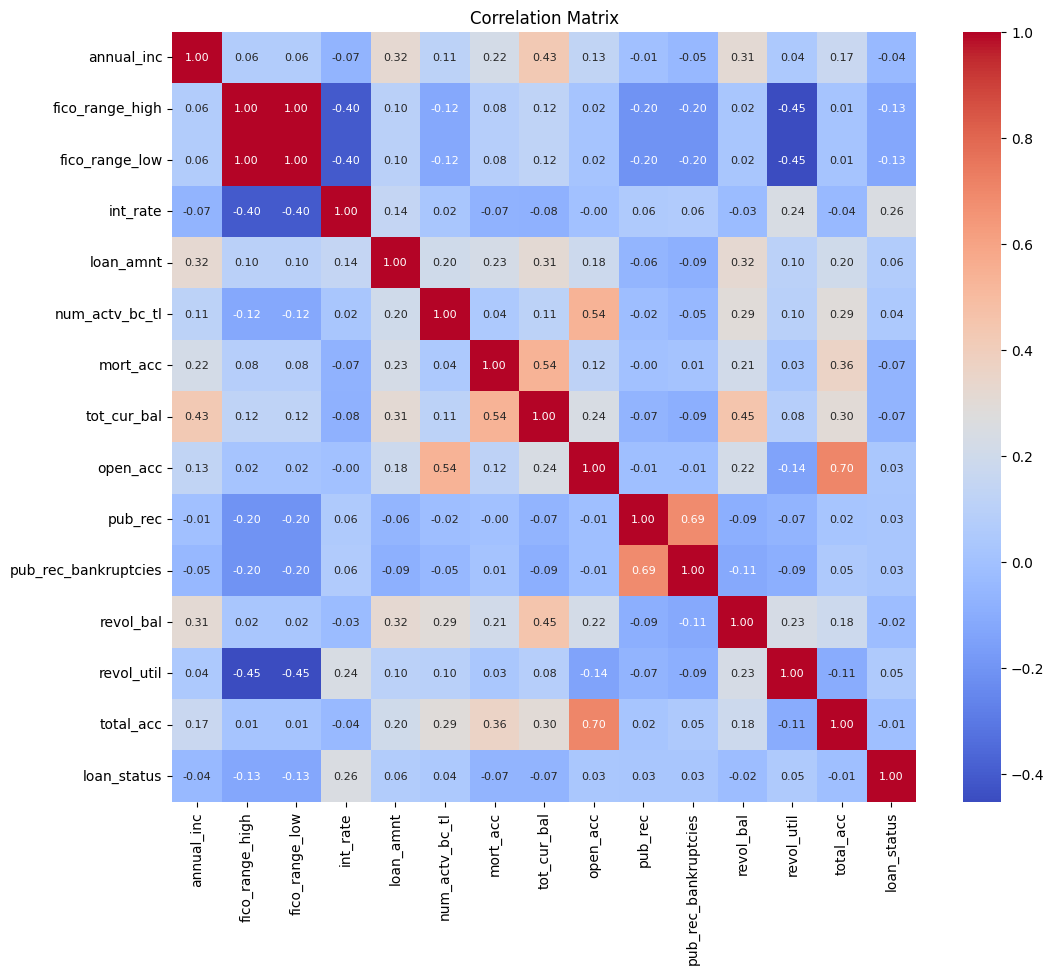

In [62]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status']
cor = new_train_df[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
# Save the plot as PNG file
plt.savefig('correlation_matrix.png')
plt.show()

#### The correlation matrix above indicates a high correlation of 1 between 'fico_range_high' and 'fico_range_low'. Subsequently, feature engineering was performed on both of these features below. Additionally, it was observed that the interest rate has a higher correlation with the 'loan_status'

### Outliers Plot

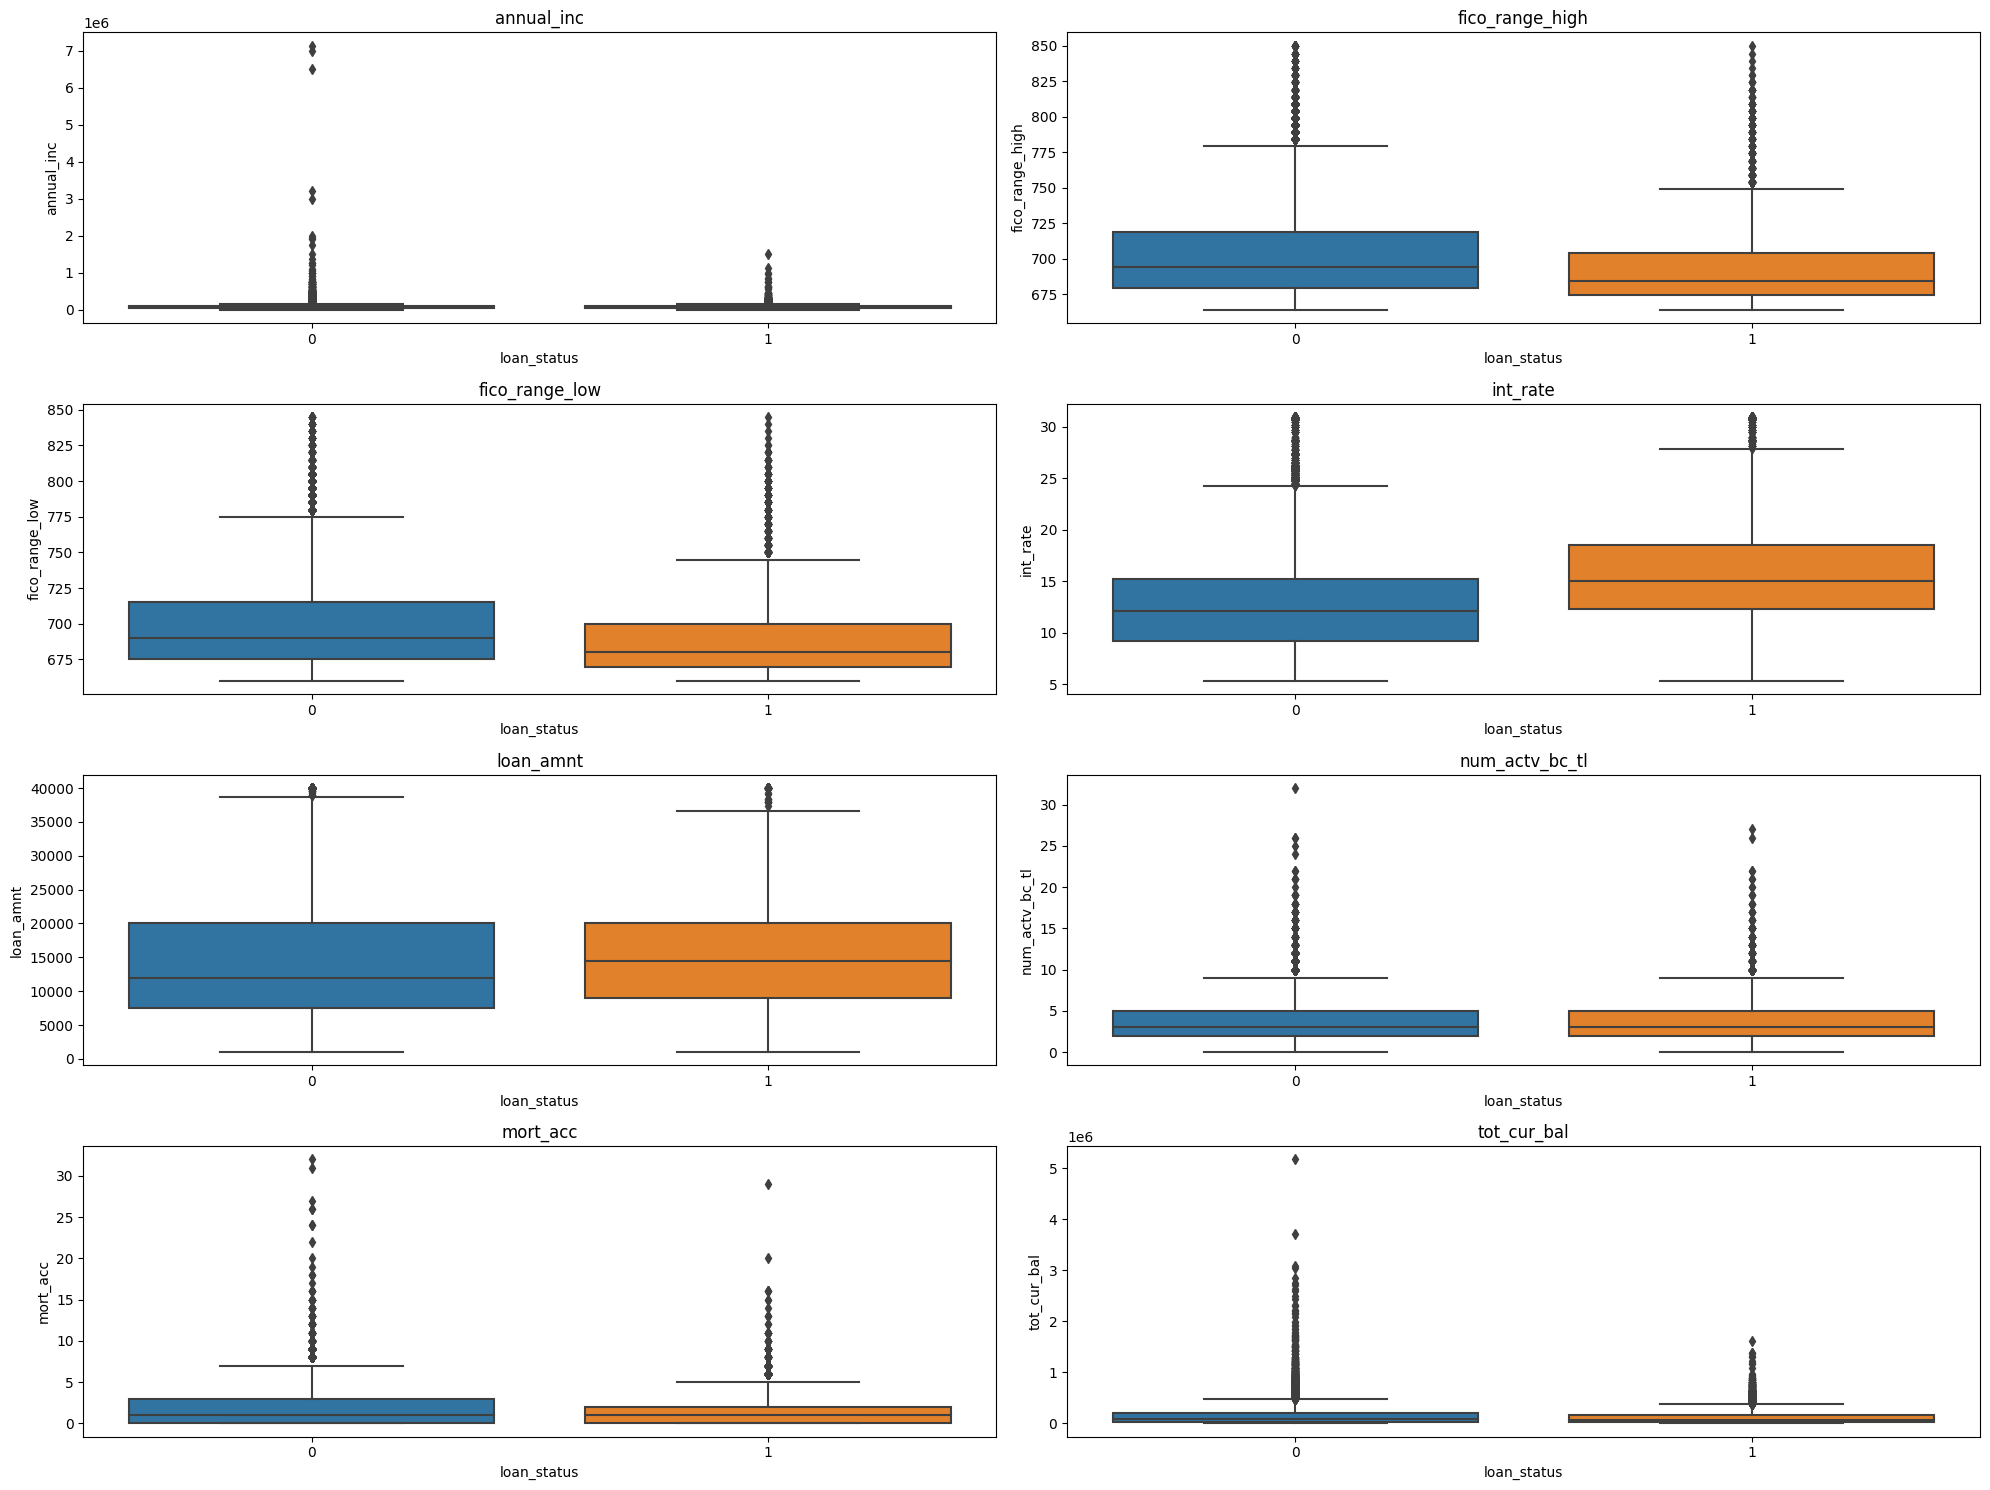

In [63]:
cols = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal']
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=new_train_df,x = 'loan_status',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()


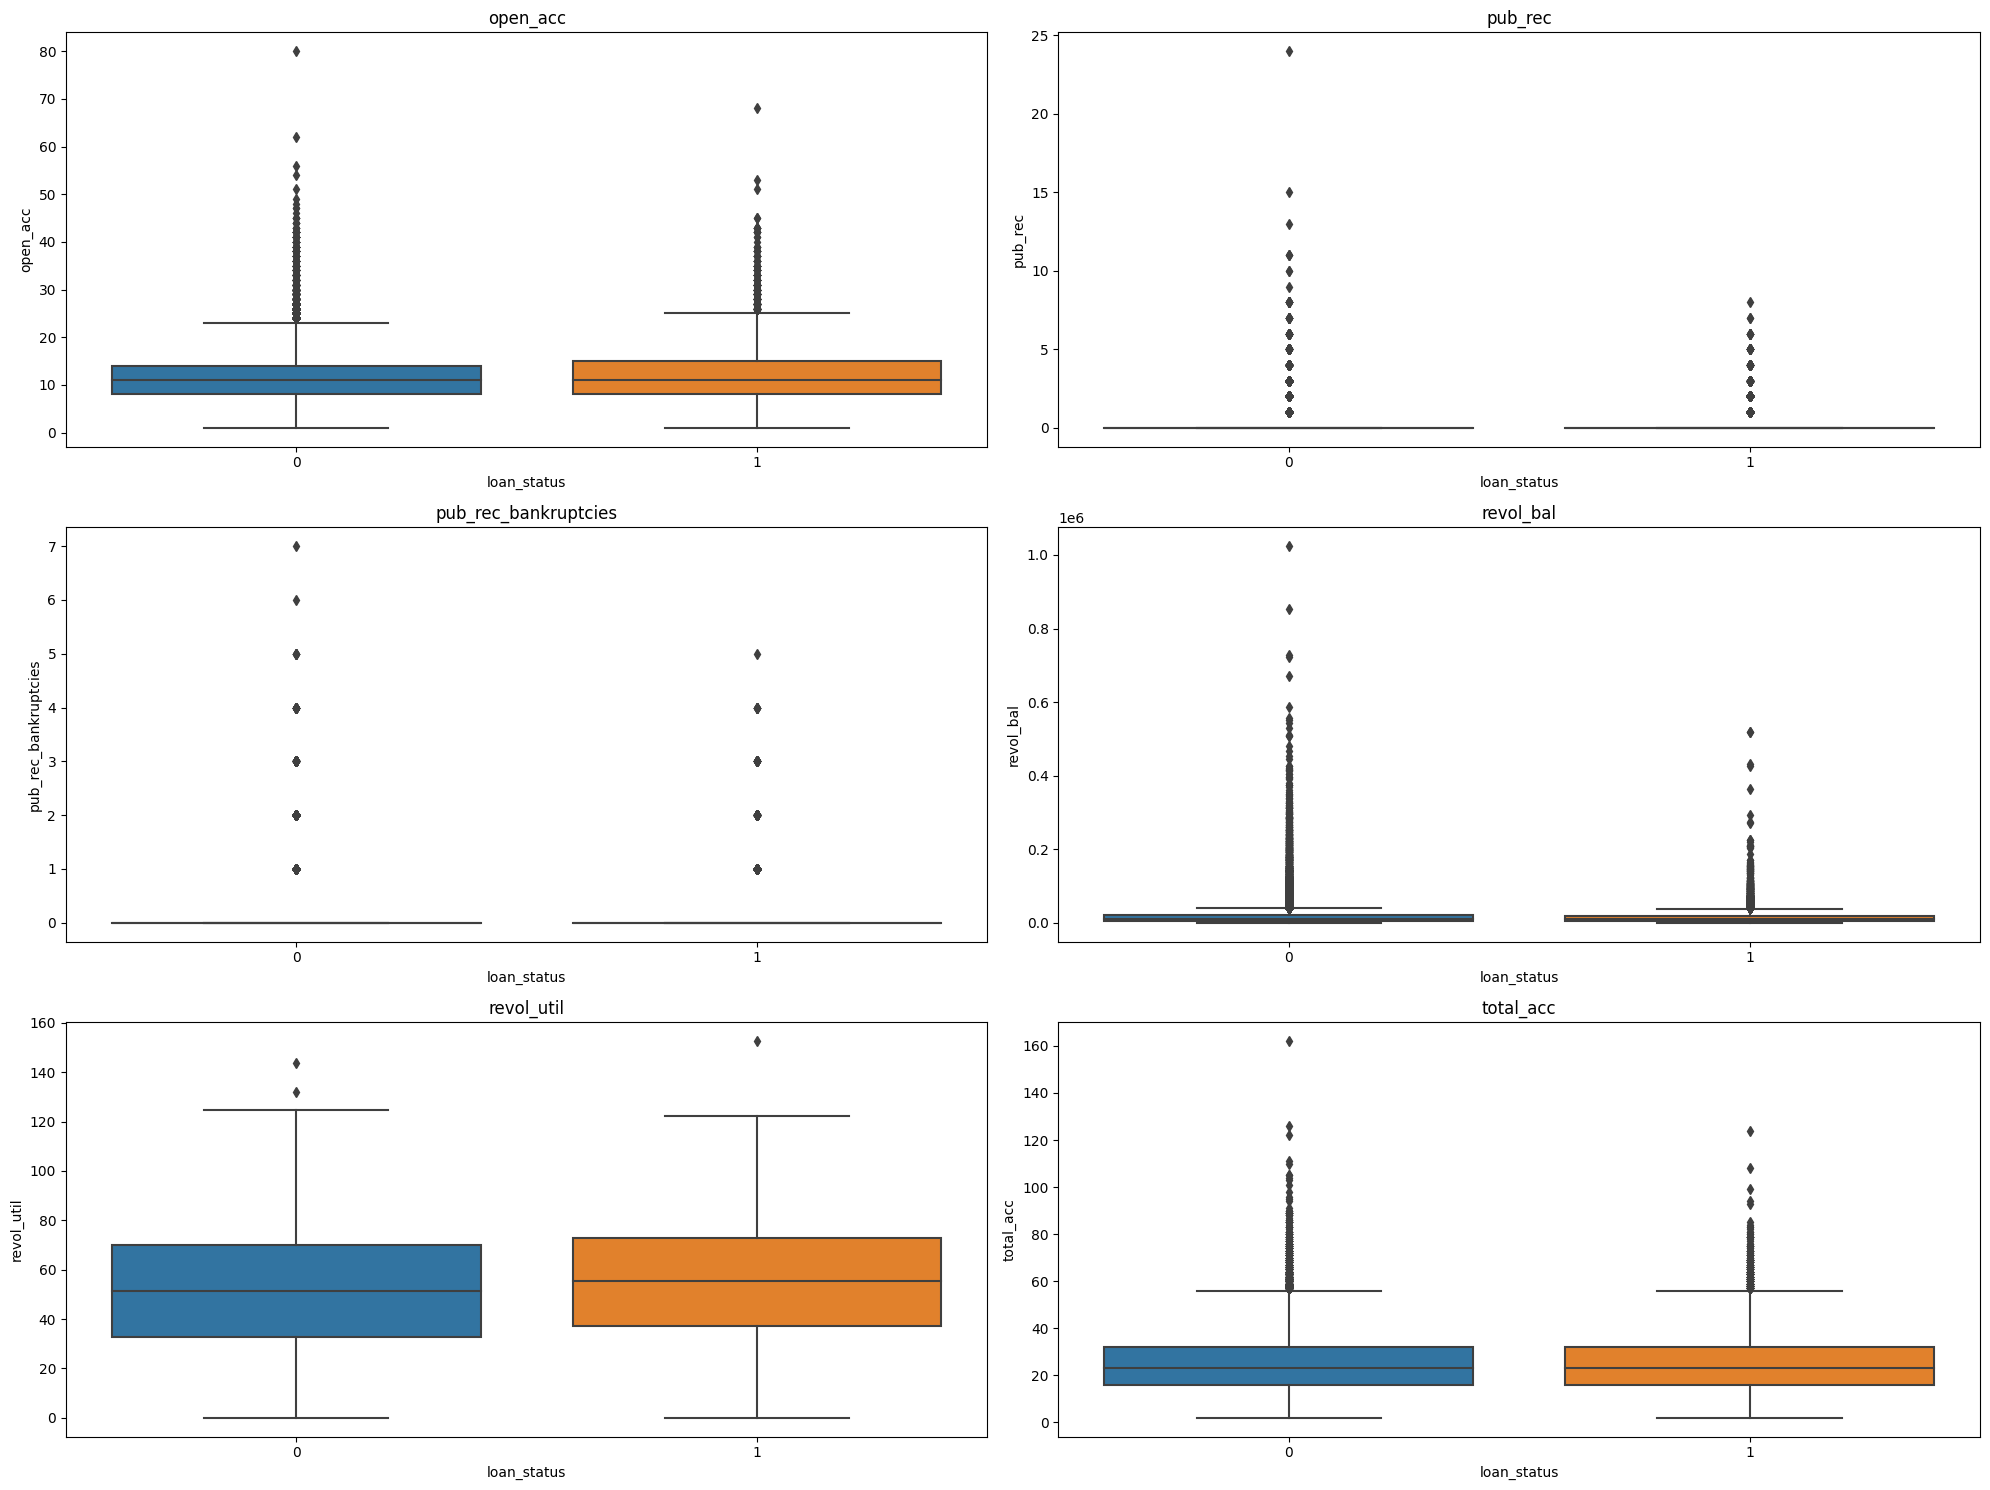

In [64]:
cols = ['open_acc','pub_rec','pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc']
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=new_train_df,x = 'loan_status',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

In [65]:
def outlier_removal(df,columns):
    new_df = new_train_df.copy()
    for col in columns:
        col_values = new_train_df[col].values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
        col_iqr = q75 - q25
        print('iqr: {}'.format(col_iqr))

        cut_off = col_iqr * 3
        lower_bound,upper_bound = q25 - cut_off, q75 + cut_off
        print('Cut Off: {}'.format(cut_off))
        print('Lower Bound: {}'.format(lower_bound))
        print('Upper Bound: {}'.format(upper_bound))

        outliers = [x for x in col_values if x < lower_bound or x > upper_bound]
        print(f'Feature {col} Outliers: {len(outliers)}')
        new_df = new_df.drop(new_df[(new_df[col] > upper_bound) | (new_df[col] < lower_bound)].index)
        print('----' * 30)
    print('Number of Instances after outliers removal: {}'.format(new_df.loan_status.value_counts()))
    return new_df

In [66]:
cols = ['annual_inc']
new_train_df = outlier_removal(new_train_df,cols)

Quartile 25: 46000.0 | Quartile 75: 90000.0
iqr: 44000.0
Cut Off: 132000.0
Lower Bound: -86000.0
Upper Bound: 222000.0
Feature annual_inc Outliers: 1257
------------------------------------------------------------------------------------------------------------------------
Number of Instances after outliers removal: loan_status
0    62872
1    15787
Name: count, dtype: int64


Given the presence of numerous outliers in the 'annual_inc' feature, it was decided to remove these outliers. However, a higher threshold was set to ensure that the dataset remains intact, considering its already significant imbalance.

In [67]:
new_train_df.home_ownership.value_counts()

home_ownership
MORTGAGE    38725
RENT        31402
OWN          8503
ANY            19
OTHER           6
NONE            4
Name: count, dtype: int64

In [68]:
new_train_df['home_ownership'] = new_train_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'OTHER')

In [69]:
new_train_df.home_ownership.value_counts()

home_ownership
MORTGAGE    38725
RENT        31402
OWN          8503
OTHER          29
Name: count, dtype: int64

##### All additional values in the 'home_ownership' feature have been successfully grouped under the category 'OTHER'

In [70]:
print(new_train_df['pub_rec'].value_counts())

# Define conditions and choices for years
conditions_pub_rec = [
    (new_train_df['pub_rec'] == 0),
    (new_train_df['pub_rec'] == 1),
    (new_train_df['pub_rec'] > 1) 
]

choices_pub_rec = ['No_derogatory_records','1_derogatory', '>1_derogatory_records']

# Create the 'year_category' column based on conditions
new_train_df['pub_rec'] = np.select(conditions_pub_rec, choices_pub_rec, default='unknown')



pub_rec
0     65203
1     11274
2      1381
3       481
4       185
5        66
6        38
8        11
7        11
11        3
10        2
13        1
24        1
15        1
9         1
Name: count, dtype: int64


In [71]:
new_train_df['pub_rec'].value_counts()

pub_rec
No_derogatory_records    65203
1_derogatory             11274
>1_derogatory_records     2182
Name: count, dtype: int64

Thus, all instances with more than one derogatory public record are grouped and labeled accordingly, considering the small number of records exceeding this threshold

In [72]:
print(new_train_df['pub_rec_bankruptcies'].value_counts())

# Define conditions and choices for years
conditions_pub_bankrupties = [
    (new_train_df['pub_rec_bankruptcies'] == 0),
    (new_train_df['pub_rec_bankruptcies'] == 1),
    (new_train_df['pub_rec_bankruptcies'] > 1) 
]

choices_pub_bankrupties = ['No_bankrupties','1_bankrupties', '>1_bankrupties']

# Create the 'pub_rec_bankruptcies' column based on conditions
new_train_df['pub_rec_bankruptcies'] = np.select(conditions_pub_bankrupties, choices_pub_bankrupties, default='unknown')
new_train_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    68616
1.0     9406
2.0      477
3.0      118
4.0       33
5.0        7
7.0        1
6.0        1
Name: count, dtype: int64


pub_rec_bankruptcies
No_bankrupties    68616
1_bankrupties      9406
>1_bankrupties      637
Name: count, dtype: int64

Thus, all instances with more than one public record bankruptcies are grouped and labeled accordingly, considering the small number of records exceeding this threshold

In [73]:
#Dropping the newly created columns that were used for visualization and 'earliest_cr_line' column as it has timestamp.
#However retaining only the year_category column
new_train_df.drop(['month','year','earliest_cr_line'],axis= 1,inplace=True)

In [74]:
# Since 'purpose' and 'title' convey similar information about the loan, dropping the 'title' column.
# Since 'grade' and 'sub_grade' convey similar information about the loan grades, dropping the 'grade' column.
new_train_df.drop(['title','grade'],axis= 1,inplace=True)

In [75]:
#As fico_high and fico_low are highly correlated with each other,creating a new feature 'fico_range' which is a mean 
# and dropping the fico_high and fico_low
new_train_df['fico_range'] = (new_train_df['fico_range_high'] + new_train_df['fico_range_low']) / 2
new_train_df.drop(['fico_range_high','fico_range_low'],axis= 1,inplace=True)

In [76]:
#identify the numerical columns
num_cols = new_train_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = new_train_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(new_train_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

#### Skewness of the numerical features

In [77]:
#find the skewness of the numerical features
skewness = new_train_df[numerical_columns].skew()
print(skewness)

annual_inc        1.210485
int_rate          0.711905
loan_amnt         0.800095
num_actv_bc_tl    1.382635
mort_acc          1.668037
tot_cur_bal       1.825035
open_acc          1.270261
revol_bal         7.030864
revol_util       -0.065280
total_acc         0.962828
fico_range        1.296686
dtype: float64


In [78]:
# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)

['annual_inc', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'revol_bal', 'fico_range']


In [79]:
# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    new_train_df[col] = np.log1p(new_train_df[col])

After applying the log transformation, although the skewness has not been entirely eliminated, it has been significantly reduced.

#### Chi square test for finding the correlation between the categorical features

In [80]:
from scipy.stats import chi2_contingency
significance_level =0.05

for feature in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(new_train_df[feature], new_train_df['loan_status'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Hypothesis testing
    if p < significance_level:
        print("Null hypothesis rejected. There is a significant association between", feature, "and the target feature.")
    else:
        print("Null hypothesis not rejected.There is no significant association between", feature, "and the target feature.")
    
    print()


Null hypothesis rejected. There is a significant association between addr_state and the target feature.

Null hypothesis not rejected.There is no significant association between emp_length and the target feature.

Null hypothesis not rejected.There is no significant association between emp_title and the target feature.

Null hypothesis rejected. There is a significant association between home_ownership and the target feature.

Null hypothesis rejected. There is a significant association between application_type and the target feature.

Null hypothesis rejected. There is a significant association between initial_list_status and the target feature.

Null hypothesis rejected. There is a significant association between pub_rec and the target feature.

Null hypothesis rejected. There is a significant association between pub_rec_bankruptcies and the target feature.

Null hypothesis rejected. There is a significant association between purpose and the target feature.

Null hypothesis rejected.

From the above statistical analysis, it's evident that 'emp_length' and 'emp_title' are not highly associated with the target feature. Therefore, both features are dropped

In [81]:
new_train_df.drop(['emp_length','emp_title'],axis=1,inplace=True)

### Identify the numerical,categorical and binary features

In [82]:
#identify the numerical columns
num_cols = new_train_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = new_train_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(new_train_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

### Feature Encoding

In [83]:
# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(new_train_df[categorical_columns])
# Concatenate the original DataFrame with the encoded features along the columns axis
new_train_df = pd.concat([new_train_df, encoded_features], axis=1)
# Drop the original categorical columns if needed
new_train_df.drop(categorical_columns, axis=1, inplace=True) 

### Feature Scaling

In [84]:
def feature_scaling(dataset, num_cols):
    sc_x = StandardScaler()
    dataset[num_cols] = sc_x.fit_transform(dataset[num_cols])
    return dataset

final_train_df = feature_scaling(new_train_df, numerical_columns)

In [85]:
#First few entries from the final train dataset
final_train_df.head()

,annual_inc,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,revol_bal,revol_util,total_acc,...,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,year_category_1980 -1990,year_category_1990-2000,year_category_2000-2010,year_category_2010-2020,year_category_before 1980
0,0.558598,1.203808,0.448369,-1.318087,-0.047966,1.188325,-0.853967,-0.500739,1.708158,-1.415231,...,False,True,False,True,False,False,True,False,False,False
1,-0.874380,-0.649106,-0.633339,0.436169,-1.067120,-1.029962,-1.530450,0.604992,0.346380,-1.081172,...,True,False,False,False,True,True,False,False,False,False
2,-0.103562,-0.374212,0.439622,0.436169,0.548200,-0.909060,-0.853967,0.731824,1.499598,-0.747113,...,True,False,False,True,False,False,False,True,False,False
3,0.881614,-0.858949,0.672874,0.436169,-0.047966,0.003880,0.287701,0.538531,0.702160,-0.496569,...,True,False,False,True,False,True,False,False,False,False
4,0.443345,2.219449,2.422267,2.539482,1.990341,-0.089668,1.729412,1.061596,1.560939,2.844018,...,False,True,False,False,True,False,True,False,False,False


In [86]:
#Shape of the final train dataset
final_train_df.shape

(78659, 135)

# Selection of Models

In [87]:
#Define the classifiers
classifiers ={'Logistic_Regression':LogisticRegression(),
              'K_Neighbors':KNeighborsClassifier(),
              'RandomForest_Classifier':RandomForestClassifier(n_jobs=-1),
              'Gradient_Boosting':GradientBoostingClassifier(),
              'XGBoost' : XGBClassifier()
               }

### Train-Test Split

In [88]:
from sklearn.model_selection import train_test_split
X = final_train_df.drop('loan_status',axis= 1)
y = final_train_df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=124,stratify=y)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55061, 134)
(23598, 134)
(55061,)
(23598,)


In [90]:
y_train.value_counts(normalize=True)

loan_status
0    0.799295
1    0.200705
Name: proportion, dtype: float64

Due to the stratified approach used in train-test splitting, we observe a consistent percentage distribution between the train and test datasets

In [91]:
#Create an empty dataframe to store scores for various algorithms

score_card = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
score_card1 = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
#update the result table for all the scores
#Performance measure considered for model comparison are AUC score,Precision,Recall,Accuracy,F1-score.
#compile the required information in a user defined function
def update_score_card(model,accuracy,recall,precision,AUC_score,f1):
    global score_card
    new_score_card = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card = pd.concat([score_card,new_score_card],ignore_index=True)
    
def update_score_card1(model,accuracy,recall,precision,AUC_score,f1):
    global score_card1
    new_score_card1 = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    #append the results to the dataframe
    score_card1 = pd.concat([score_card1,new_score_card1],ignore_index=True)
    

### Training using different Classifiers for original dataset without resampling

In [92]:
for key, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Original_dataset'
    update_score_card1(key,accuracy,recall,precision,roc_auc,f1)     

In [93]:
score_card1

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ Original_dataset,0.798457,0.049831,0.479675,0.518129,0.090283
1,K_Neighbors+ Original_dataset,0.773540,0.151182,0.350980,0.540494,0.211334
2,RandomForest_Classifier+ Original_dataset,0.799136,0.052787,0.496032,0.519660,0.095420
3,Gradient_Boosting+ Original_dataset,0.799941,0.046242,0.517730,0.517713,0.084900
4,XGBoost+ Original_dataset,0.793542,0.103885,0.439286,0.535295,0.168033


Although we have achieved better accuracy, it's evident that the classifiers performed poorly in terms of recall and F1 score.So balancing the data using different sampling techniques such as SMOTE,Random Undersampler ,Random Oversampler and trained below

In [94]:
smote = SMOTE(random_state= 24)
# Loop through each classifier and evaluate its performance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ SMOTE'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)

In [95]:
undersampler = RandomUnderSampler(random_state=24)
# Loop through each classifier and evaluate its performance
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_undersampled, y_train_undersampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Undersampling'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)   

In [96]:
oversampler = RandomOverSampler(random_state=24)
# Loop through each classifier and evaluate its performance
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
for key, clf in classifiers.items():
    clf.fit(X_train_oversampled, y_train_oversampled)
    y_pred = clf.predict(X_test)
# Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
# Compute recall
    recall = recall_score(y_test, y_pred)
# Compute precision
    precision = precision_score(y_test, y_pred)
# Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)
# Compute F1-score
    f1 = f1_score(y_test, y_pred)
    key = key +'+ Oversampling'
    update_score_card(key,accuracy,recall,precision,roc_auc,f1)


In [97]:
sorted_score_card = score_card.sort_values(by='f1-score', ascending=False)
sorted_score_card.style.highlight_max(color = 'pink', axis = 0)

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
10,Logistic_Regression+ Oversampling,0.636283,0.684755,0.313849,0.654434,0.430420
5,Logistic_Regression+ Undersampling,0.636664,0.682010,0.313653,0.653644,0.429693
8,Gradient_Boosting+ Undersampling,0.640648,0.669975,0.314470,0.651629,0.428032
13,Gradient_Boosting+ Oversampling,0.640393,0.664696,0.313359,0.649494,0.425923
7,RandomForest_Classifier+ Undersampling,0.638741,0.657939,0.310947,0.645930,0.422308
14,XGBoost+ Oversampling,0.679041,0.566723,0.327078,0.636983,0.414774
9,XGBoost+ Undersampling,0.628697,0.652660,0.302802,0.637670,0.413678
6,K_Neighbors+ Undersampling,0.605645,0.596917,0.276506,0.602377,0.377941
11,K_Neighbors+ Oversampling,0.611153,0.506334,0.259636,0.571903,0.343258
3,Gradient_Boosting+ SMOTE,0.758327,0.300253,0.373130,0.586798,0.332748


From the above score card, it's evident that oversampling performs better than the other two methods in terms of sampling. When considering different classifiers, Logistic Regression performs better in F1 score while XGBoost and Gradient Boosting perform better in terms of Accuracy. Therefore, we can proceed further with ensemble techniques using the above classifiers.

In [98]:
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()


voting_classifier = VotingClassifier(estimators=[('lr', logistic_regressor), ('gb', gb_classifier)], voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.7127298923637596
The recall is: 0.47677364864864863
The precision is: 0.3442597957005641
The ROC_AUC is: 0.6243745244621676
The f1-Score is: 0.39982293050022133


In [99]:
from sklearn.ensemble import VotingClassifier
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()
ada_classifier = AdaBoostClassifier()
xgb = XGBClassifier()

voting_classifier = VotingClassifier(estimators=[('gb', gb_classifier), ('lr', logistic_regressor),('xgb',xgb)], 
                                     voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.6695906432748538
The recall is: 0.5878378378378378
The precision is: 0.32263298180553945
The ROC_AUC is: 0.6389777673973411
The f1-Score is: 0.41661054994388325


In [100]:
from sklearn.ensemble import VotingClassifier
# Define your classifiers
logistic_regressor = LogisticRegression()
gb_classifier = GradientBoostingClassifier()
ada_classifier = AdaBoostClassifier()
xgb = XGBClassifier()

voting_classifier = VotingClassifier(estimators=[('xgb',xgb),
                                                  ('lr', logistic_regressor)], voting='soft')

selector = SelectKBest(score_func=f_classif, k=10)
X_test_selected = selector.fit_transform(X_test, y_test)
X_train_selected = selector.fit_transform(X_train_oversampled, y_train_oversampled)
voting_classifier.fit(X_train_selected, y_train_oversampled)
y_predictions = voting_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test,y_predictions)
recall  = recall_score(y_test,y_predictions)
precision = precision_score(y_test,y_predictions)
AUC_score = roc_auc_score(y_test,y_predictions)
f1 = f1_score(y_test,y_predictions)
print("The accuracy is: ", accuracy)
print("The recall is:", recall)
print("The precision is:", precision)
print("The ROC_AUC is:",AUC_score)
print("The f1-Score is:",f1)

The accuracy is:  0.6837443851173828
The recall is: 0.5506756756756757
The precision is: 0.32833941835578495
The ROC_AUC is: 0.6339159313592035
The f1-Score is: 0.4113889107973815


We have evaluated 3 ensemble techniques above.
1. Logistic Regression + Gradient Boosting
2. Logistic Regression + XGBoosting + Gradient Boosting
3. Logistic Regression + XGBoosting.

In all the above we could find Logistic Regression + XGBoosting provide better accuracy and F1 score than other techniques,So proceeding with xgboosting+ logistic regression

### Cross-Validation

In [101]:
# Define the base classifiers
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)

#Ensemble model combining logistic regression and XGBoost with soft voting.
voting_classifier = VotingClassifier(estimators=[('lr', lr),('xgb',xgb)], voting='soft')

# Perform stratified k-fold cross-validation predictions on the training dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(voting_classifier, X_train_oversampled, y_train_oversampled, cv=skf)

# Print classification report and confusion matrix for cross-validated predictions
print("Classification Report for Cross-Validated Predictions:")
print(classification_report(y_train_oversampled, y_pred_cv))


Classification Report for Cross-Validated Predictions:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70     44010
           1       0.70      0.75      0.72     44010

    accuracy                           0.71     88020
   macro avg       0.71      0.71      0.71     88020
weighted avg       0.71      0.71      0.71     88020



In [102]:
# Train the model on the entire training dataset
voting_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test dataset
y_pred_test = voting_classifier.predict(X_test)

# Evaluate the model's performance on the test dataset
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.68      0.76     18862
           1       0.33      0.62      0.43      4736

    accuracy                           0.67     23598
   macro avg       0.60      0.65      0.60     23598
weighted avg       0.77      0.67      0.70     23598



### Hyperparameter Tuning

In [103]:
#Finding the best parameters for logistic regression
logistic_regressor = LogisticRegression()
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10] }
# Define GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(estimator=logistic_regressor, param_grid=param_grid_lr, scoring='f1', cv=5)
# Fit GridSearchCV for the classifier
grid_search_lr.fit(X_train_selected, y_train_oversampled)

# Get best hyperparameters and best estimators
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

In [104]:
print(best_params_lr)

{'C': 10, 'penalty': 'l2'}


In [105]:
#Finding the best parameters for XGBoost
xgb = XGBClassifier()
param_grid_xgb = {
    'n_estimators': [100,300,500],
    'max_depth': [3,5,7],
    'learning_rate': [0.1, 0.01]
}

# Define GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='f1', cv=5)
grid_search_xgb.fit(X_train_selected, y_train_oversampled)

# Get best hyperparameters and best estimators
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_


In [106]:
print(best_params_xgb)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


In [107]:
#Create a new VotingClassifier with the best estimators obtained
voting_classifier_tuned = VotingClassifier(estimators=[
    ('xgb', best_estimator_xgb),
    ('lr', best_estimator_lr)
], voting='soft')

# Finally, fit the tuned voting classifier and evaluate its performance
voting_classifier_tuned.fit(X_train_oversampled, y_train_oversampled)
y_predictions_tuned = voting_classifier_tuned.predict(X_test)

In [108]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_predictions_tuned)
recall = recall_score(y_test, y_predictions_tuned)
precision = precision_score(y_test, y_predictions_tuned)
AUC_score = roc_auc_score(y_test, y_predictions_tuned)
f1 = f1_score(y_test, y_predictions_tuned)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("AUC Score:", AUC_score)
print("F1 Score:", f1)

Accuracy: 0.6921349266887025
Recall: 0.565456081081081
Precision: 0.3396322130627774
AUC Score: 0.644699199484449
F1 Score: 0.42437207828222795


In [109]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
report = classification_report(y_test,y_predictions_tuned,target_names=target_names)
print(report)

              precision    recall  f1-score   support

 Negative(0)       0.87      0.72      0.79     18862
 Positive(1)       0.34      0.57      0.42      4736

    accuracy                           0.69     23598
   macro avg       0.60      0.64      0.61     23598
weighted avg       0.76      0.69      0.72     23598



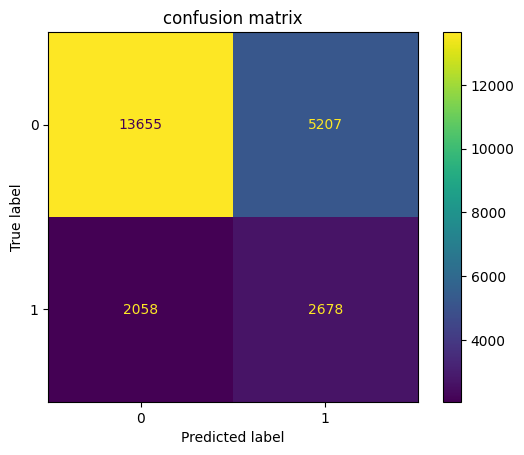

In [110]:
#checking the accuracy on the testing dataset using confusion matrix
cm = confusion_matrix(y_test,y_predictions_tuned)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=voting_classifier_tuned.classes_)
display.plot()
# Save the plot as PNG file
plt.savefig('confusion_matrix.png')
plt.title('confusion matrix')
plt.show()

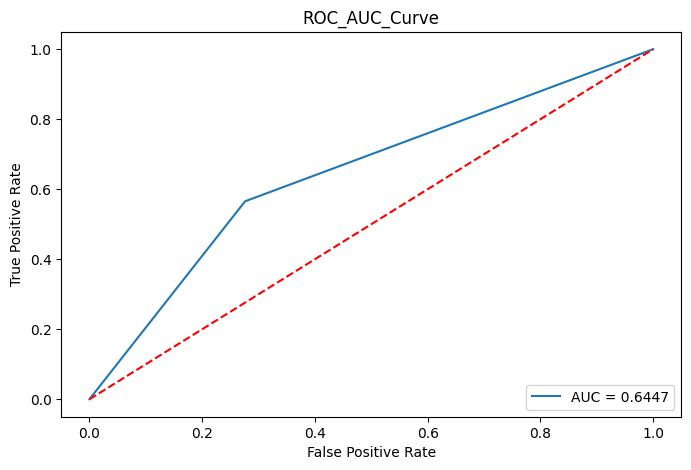

In [111]:
# Plot ROC curve
#Using ROC Curve we are checking the accuracy on the testing dataset
fpr, tpr, thresholds = roc_curve(y_test,y_predictions_tuned)
auc = round(roc_auc_score(y_test,y_predictions_tuned),4)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {auc}')
# Add threshold line at 0.50
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# Save the plot as PNG file
plt.savefig('ROC_AUC_Curve.png')
plt.title('ROC_AUC_Curve')
plt.show()

#### Conclusion
Hence, the F1 score has seen a significant improvement, rising from approximately .10 to .42 following the implementation of resampling techniques and the selection of an effective voting classifier model.

### Feature Importance

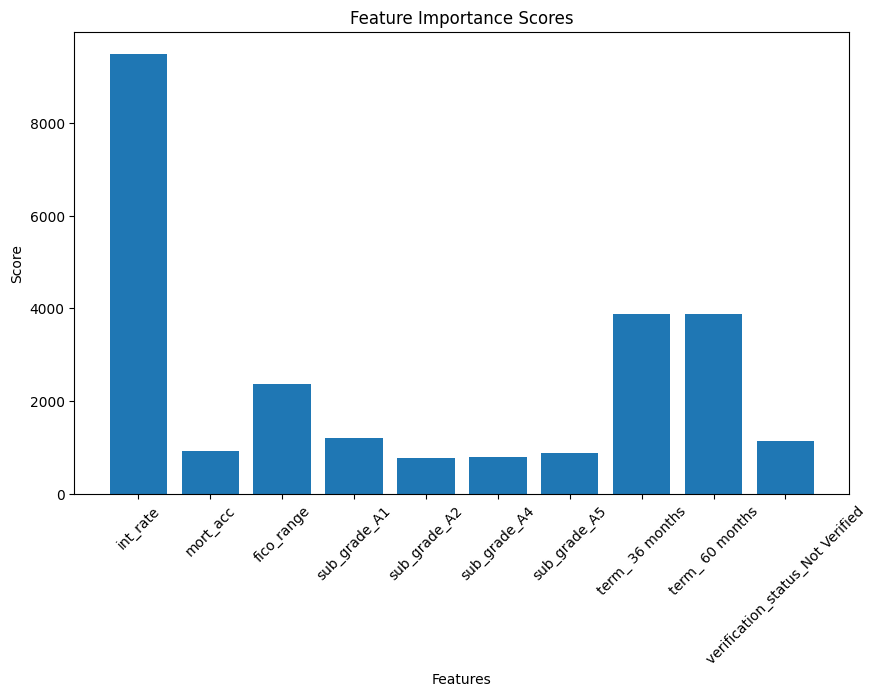

In [112]:
# Access the selected features
selected_features_indices = selector.get_support()
selected_features = X_train.columns[selected_features_indices]

# Assuming you already have selected_features from the previous code snippet
feature_scores = selector.scores_[selected_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [113]:
####################################################################################################################

Thus we have trained the model, we can now proceed to preprocess the test dataset in the same manner as the training dataset and make predictions for the target variable 'loan_status'

### Read the test dataset

In [114]:
test_df = pd.read_csv(r"D:\Gayathri\Bootcamp_DS_Upgrad\Hackathon\test_loan_data (1).csv")

### Understand the data

In [115]:
test_df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


In [116]:
#Shape of the dataset
test_df.shape

(20000, 27)

In [117]:
#Basic information about the features in the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            20000 non-null  object 
 1   annual_inc            20000 non-null  float64
 2   earliest_cr_line      20000 non-null  object 
 3   emp_length            18742 non-null  object 
 4   emp_title             18622 non-null  object 
 5   fico_range_high       20000 non-null  float64
 6   fico_range_low        20000 non-null  float64
 7   grade                 20000 non-null  object 
 8   home_ownership        20000 non-null  object 
 9   application_type      20000 non-null  object 
 10  initial_list_status   20000 non-null  object 
 11  int_rate              20000 non-null  float64
 12  loan_amnt             20000 non-null  float64
 13  num_actv_bc_tl        18989 non-null  float64
 14  mort_acc              19296 non-null  float64
 15  tot_cur_bal        

In [118]:
#Descriptive statistics for numerical features in the dataset
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,20000.0,76497.649333,85680.966779,0.00,45000.00,65000.00,90000.00,9522972.00
fico_range_high,20000.0,700.204400,31.768558,664.00,674.00,694.00,714.00,850.00
fico_range_low,20000.0,696.204250,31.767853,660.00,670.00,690.00,710.00,845.00
int_rate,20000.0,13.259451,4.772028,5.31,9.75,12.79,16.02,30.99
loan_amnt,20000.0,14426.671250,8811.387360,1000.00,7800.00,12000.00,20000.00,40000.00
num_actv_bc_tl,18989.0,3.617410,2.220795,0.00,2.00,3.00,5.00,20.00
mort_acc,19296.0,1.669310,1.981554,0.00,0.00,1.00,3.00,19.00
tot_cur_bal,18989.0,141200.889673,155848.258592,0.00,29596.00,80707.00,210215.00,2210119.00
open_acc,20000.0,11.593450,5.507847,1.00,8.00,11.00,14.00,56.00
pub_rec,20000.0,0.208000,0.568816,0.00,0.00,0.00,0.00,15.00


In [119]:
#Descriptive statistics for categorical features in the dataset
test_df.describe(include=["O"]).T

,count,unique,top,freq
addr_state,20000,50,CA,2865
earliest_cr_line,20000,568,Oct-2001,160
emp_length,18742,11,10+ years,6579
emp_title,18622,11180,Teacher,357
grade,20000,7,B,5756
home_ownership,20000,4,MORTGAGE,9900
application_type,20000,2,Individual,19610
initial_list_status,20000,2,w,11582
purpose,20000,14,debt_consolidation,11611
sub_grade,20000,35,C1,1294


In [120]:
#columns in the dataset
test_df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')

## Exploratory Data Analysis

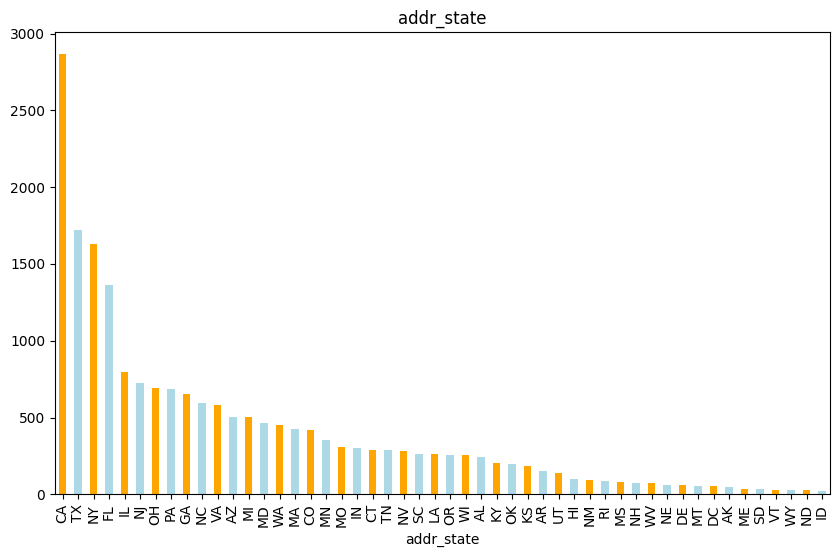

In [121]:
plt.figure(figsize=(10,6))
plt.title("addr_state")
test_df["addr_state"].value_counts().plot(kind="bar", color=['orange', 'lightblue'])
plt.show()

Text(0, 0.5, 'Count')

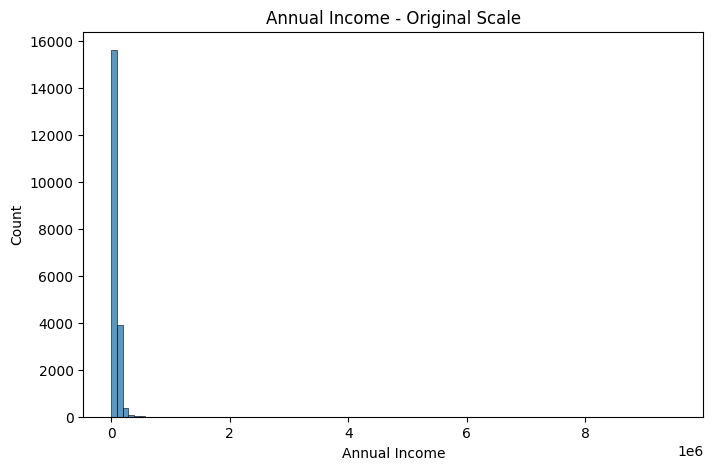

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df, x='annual_inc', bins=100)
plt.title('Annual Income - Original Scale')
plt.xlabel('Annual Income')
plt.ylabel('Count')

In [123]:
test_df['earliest_cr_line'].head()

0    May-2012
1    Dec-2001
2    Mar-1989
3    Nov-2004
4    Feb-1997
Name: earliest_cr_line, dtype: object

We can observe that earliest_cr_line includes both month and year data. To enhance visualization, we'll divide it into separate month and year components as follows:

In [124]:
# Split the values in the column by '-'
new_test_df = test_df.copy()
new_test_df[['month', 'year']] = new_test_df['earliest_cr_line'].str.split('-', expand=True)

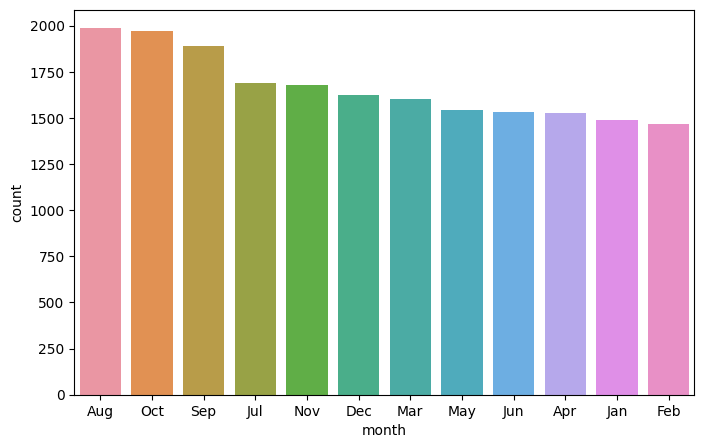

In [125]:
# Create subplots with 1 row and 2 columns
plt.figure(figsize=(8,5))

# Plot the first countplot on the first axis
# Sort the values of month column
sorted_categories = new_test_df['month'].value_counts().index
sns.countplot(data=new_test_df, x='month',order =sorted_categories)

plt.show()

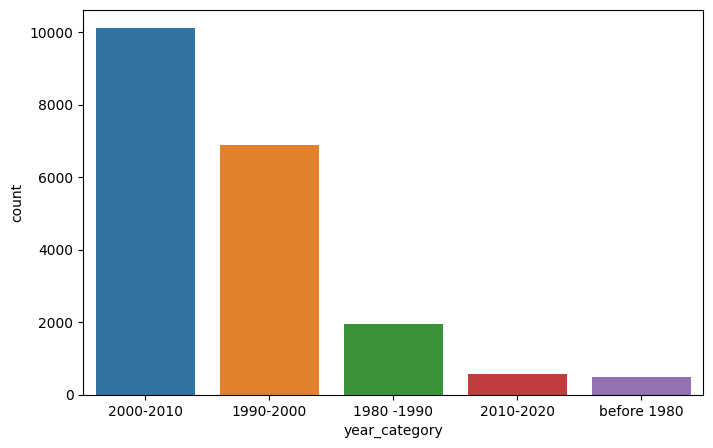

In [126]:
#To facilitate interpretation, we'll group the years into ranges as follows:
#Convert 'year' column to integers
new_test_df['year'] = new_test_df['year'].astype(int)

# Define conditions and choices for years
conditions_year = [
    (new_test_df['year']  < 1980),
    ((new_test_df['year'] >= 1980) & (new_test_df['year'] < 1990)),
    ((new_test_df['year'] >= 1990)  & (new_test_df['year'] < 2000)),
    ((new_test_df['year'] >= 2000) & (new_test_df['year'] <= 2010)),
    ((new_test_df['year'] > 2010) & (new_test_df['year'] <= 2020)),
    (new_test_df['year'] > 2020)
]

choices_year = ['before 1980','1980 -1990','1990-2000','2000-2010','2010-2020', '2020-present']

# Create the 'year_category' column based on conditions
new_test_df['year_category'] = np.select(conditions_year, choices_year, default='unknown')

# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values of year_category column
sorted_categories = new_test_df['year_category'].value_counts().index
sns.countplot(data=new_test_df, x='year_category',order=sorted_categories)
plt.show()

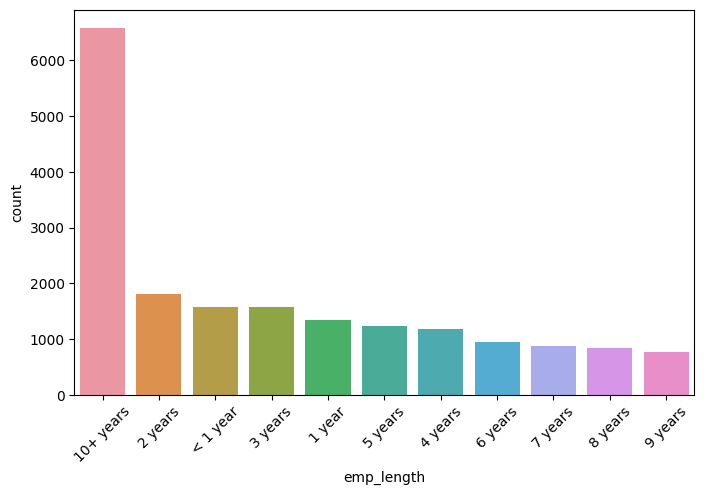

In [127]:
test_df['emp_length'].value_counts()


# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort based on the count values of emp_length column
sorted_categories = new_test_df['emp_length'].value_counts().index
sns.countplot(data=new_test_df, x='emp_length',order=sorted_categories)
plt.xticks(rotation=45)
plt.show()


In [128]:
new_test_df['emp_title'].nunique()

11180

In [129]:
new_test_df['emp_title'] = new_test_df['emp_title'].str.lower()
new_test_df['emp_title'].nunique()

10094

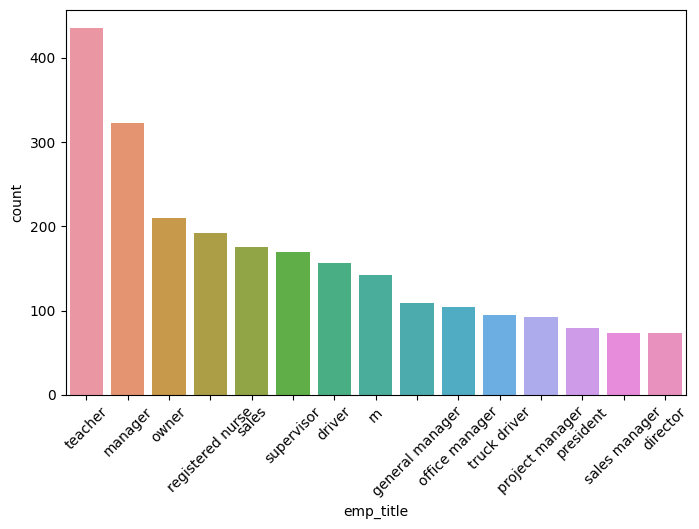

In [130]:
# Determine the top values in the column you're interested in
top_values = new_test_df['emp_title'].value_counts().nlargest(15).index
top_values

# Plot the countplot on the axis
plt.figure(figsize=(8,5))
sns.countplot(data=new_test_df,x='emp_title',order=top_values)
plt.xticks(rotation=45)
plt.show()

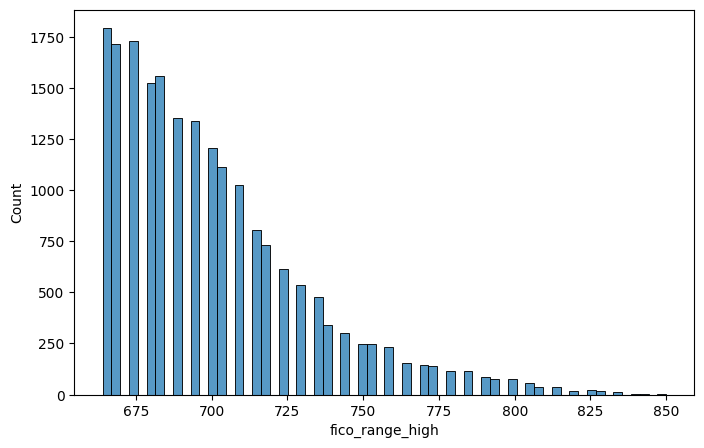

In [131]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='fico_range_high',palette ='plasma')
plt.show()

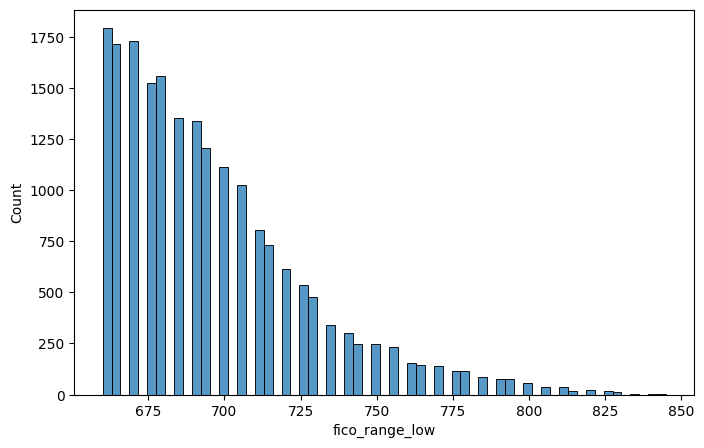

In [132]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='fico_range_low',palette ='plasma')
plt.show()

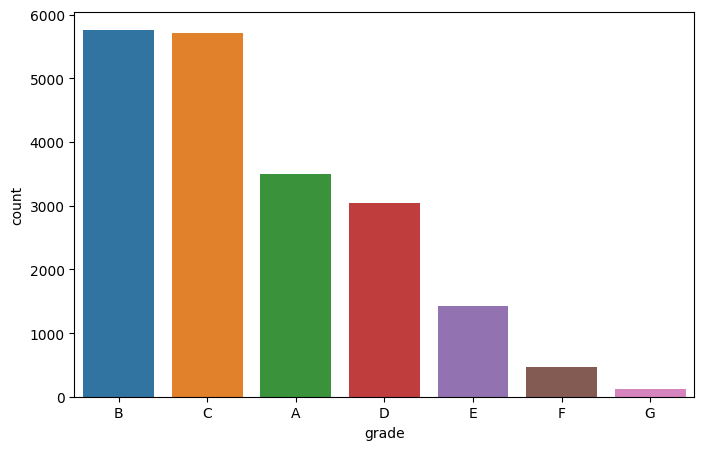

In [133]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['grade'].value_counts().index
sns.countplot(data=new_test_df, x='grade',order=sorted_counts)
plt.show()

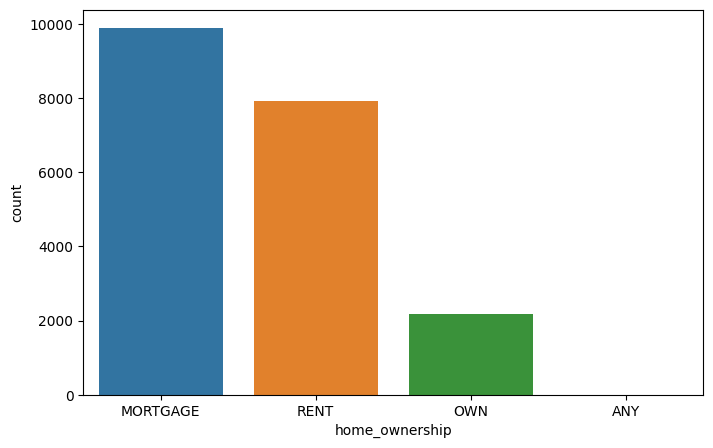

In [134]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['home_ownership'].value_counts().index
sns.countplot(data=new_test_df, x='home_ownership',order=sorted_counts)
plt.show()

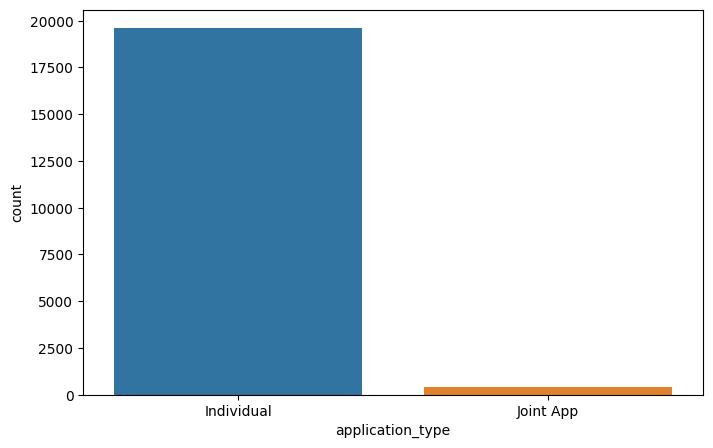

In [135]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['application_type'].value_counts().index
sns.countplot(data=new_test_df, x='application_type',order=sorted_counts)
plt.show()

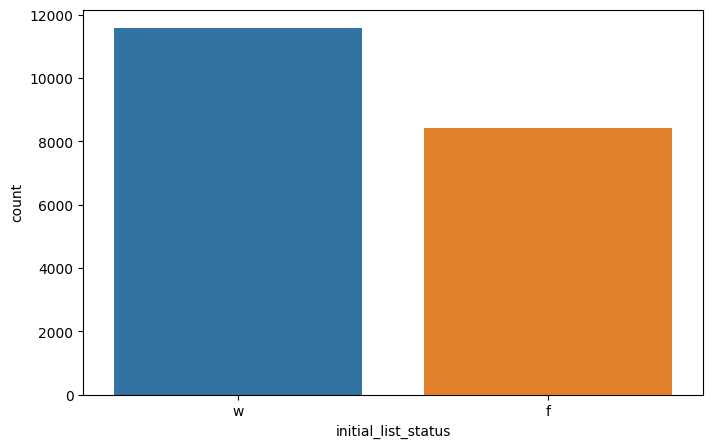

In [136]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['initial_list_status'].value_counts().index
sns.countplot(data=new_test_df, x='initial_list_status',order=sorted_counts)
plt.show()

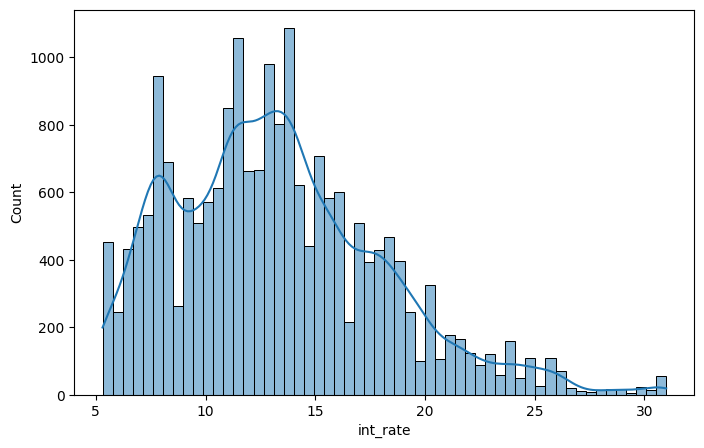

In [137]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='int_rate',kde=True)
plt.show()

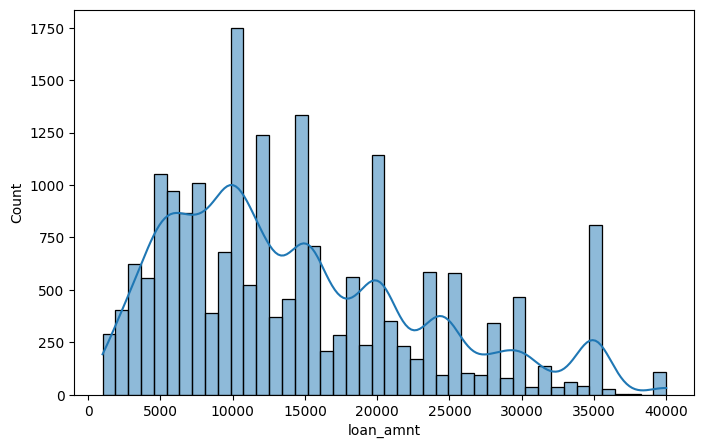

In [138]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='loan_amnt',kde=True)
plt.show()

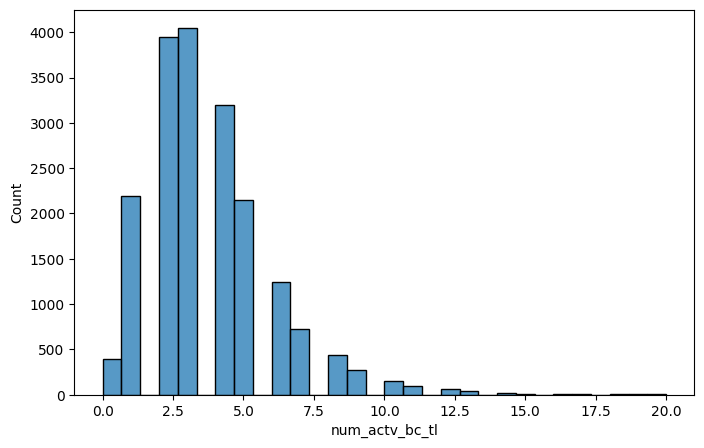

In [139]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='num_actv_bc_tl',bins=30)
plt.show()

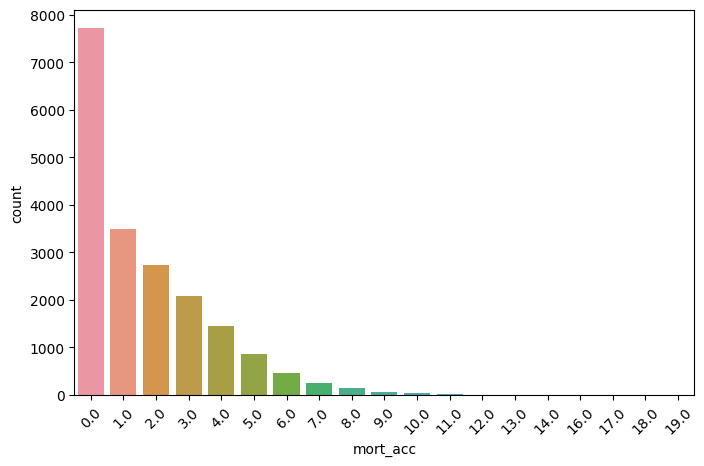

In [140]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
sns.countplot(data=new_test_df,x='mort_acc')
plt.xticks(rotation=45)
plt.show()

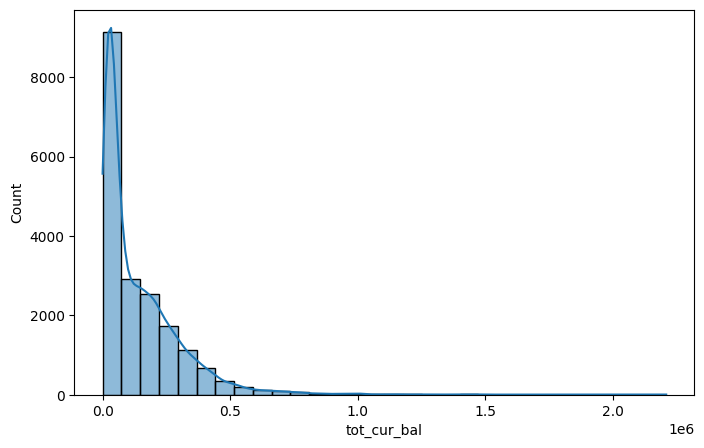

In [141]:
# Plot the histplot on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='tot_cur_bal',kde=True,bins=30)
plt.show()

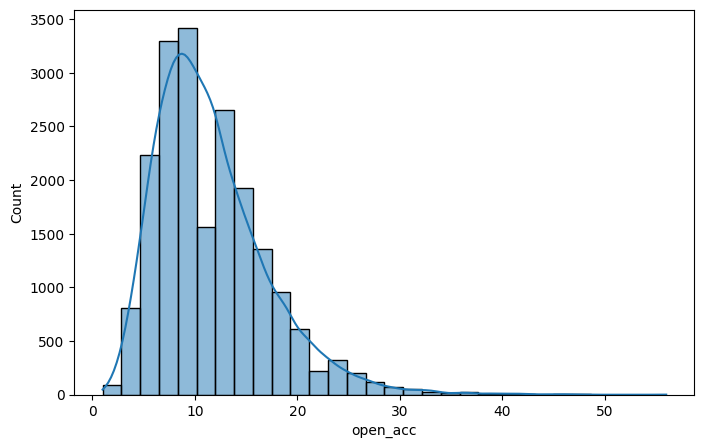

In [142]:
# Plot the histogram on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='open_acc',kde=True,bins=30)
plt.show()

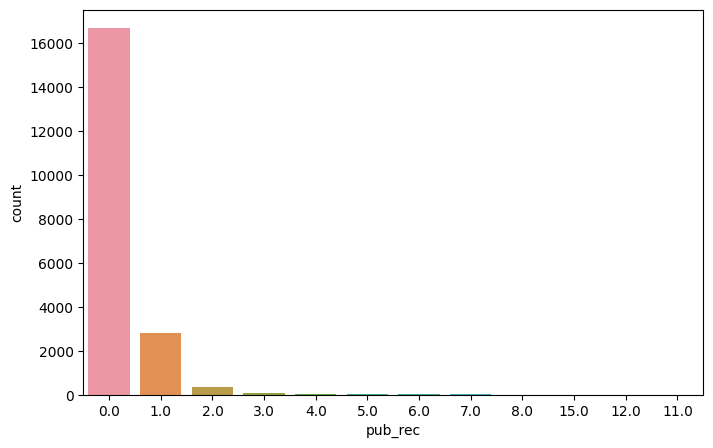

In [143]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['pub_rec'].value_counts().index
sns.countplot(data=new_test_df, x='pub_rec',order=sorted_counts)
plt.show()

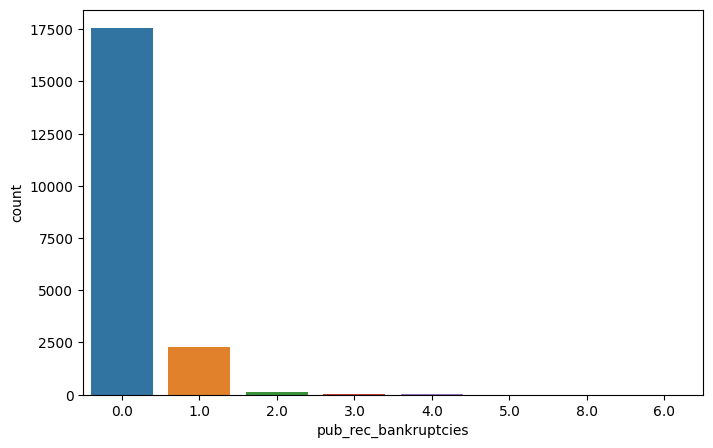

In [144]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['pub_rec_bankruptcies'].value_counts().index
sns.countplot(data=new_test_df, x='pub_rec_bankruptcies',order=sorted_counts)
plt.show()

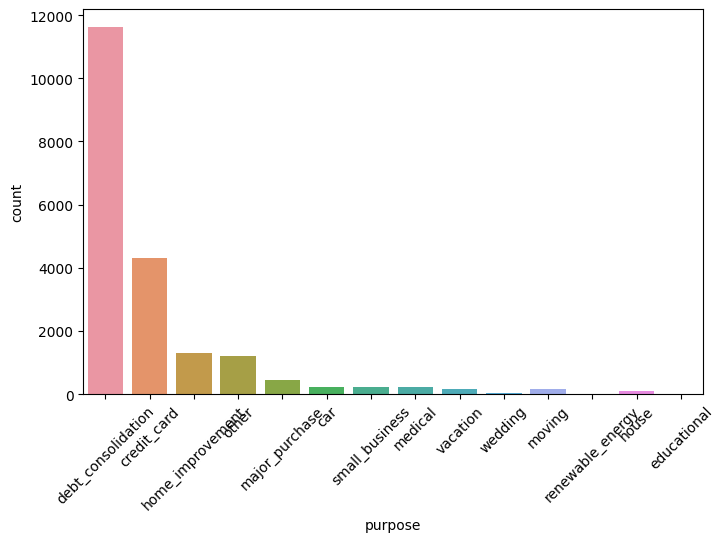

In [145]:
plt.figure(figsize=(8,5))
sns.countplot(data=test_df,x='purpose')
plt.xticks(rotation=45) 
plt.show()

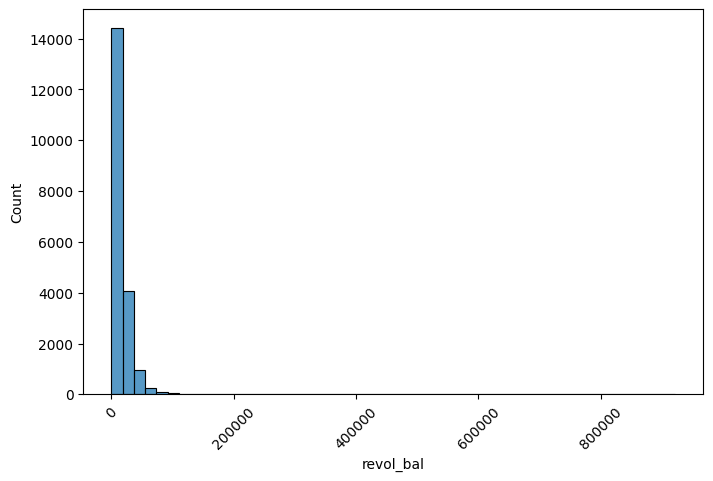

In [146]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='revol_bal',bins=50)
plt.xticks(rotation=45)
plt.show()

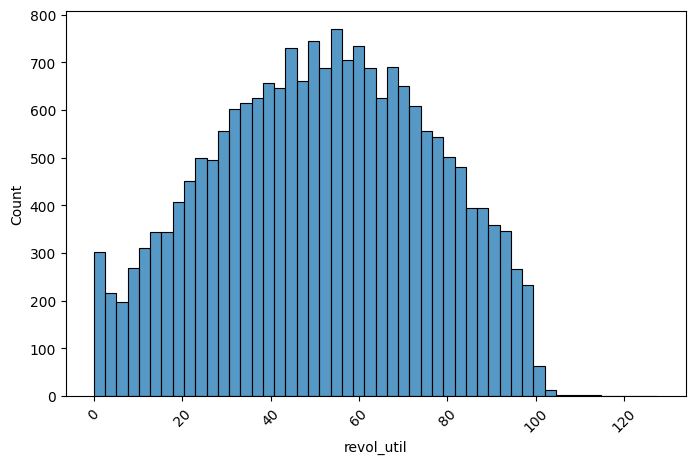

In [147]:
plt.figure(figsize=(8,5))
sns.histplot(data=test_df,x='revol_util',bins=50)
plt.xticks(rotation=45)
plt.show()

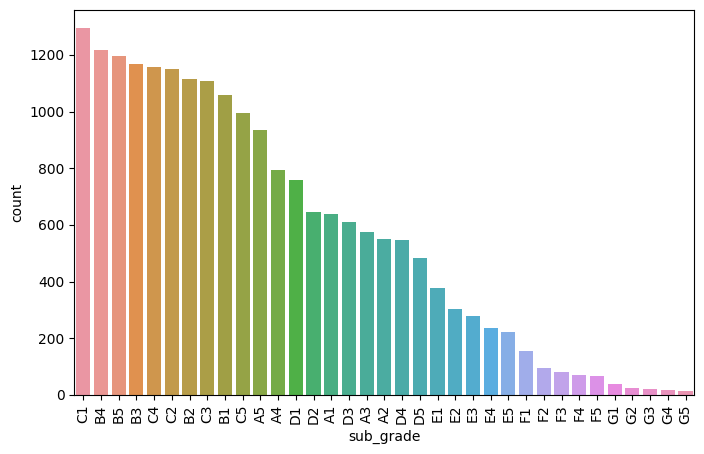

In [148]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['sub_grade'].value_counts().index
sns.countplot(data=new_test_df, x='sub_grade',order=sorted_counts)
plt.xticks(rotation=90)
plt.show()

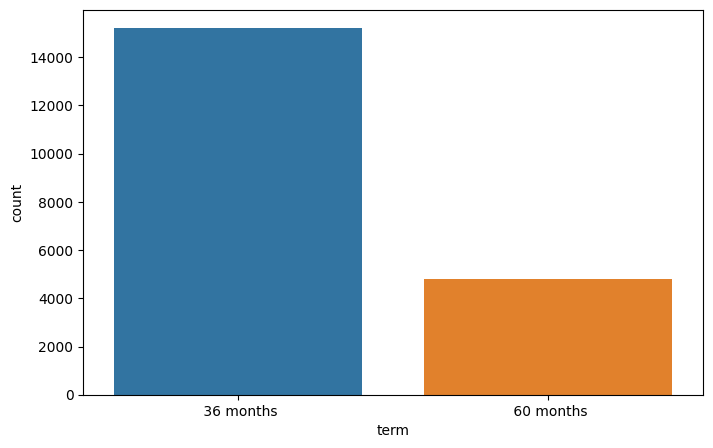

In [149]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['term'].value_counts().index
sns.countplot(data=new_test_df, x='term',order=sorted_counts)
plt.show()


In [150]:
print(new_test_df['title'].nunique())
new_test_df['title'] = new_test_df['title'].str.lower()
print(new_test_df['title'].nunique())

1623
1390


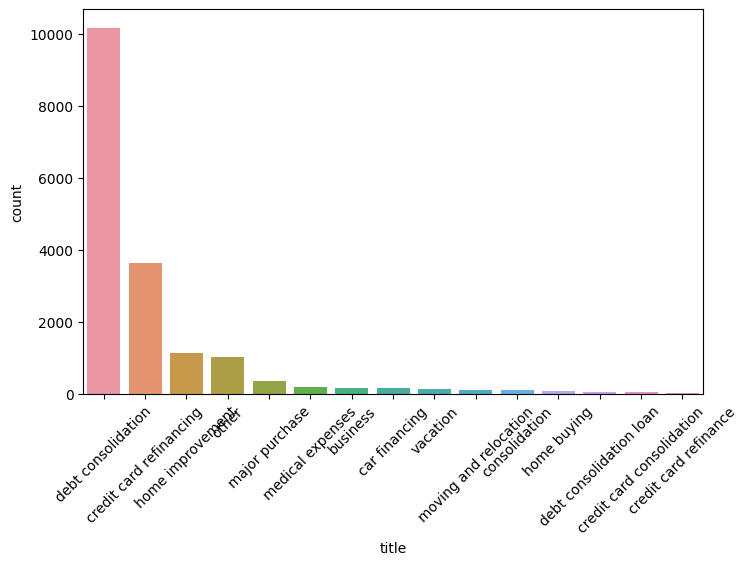

In [151]:
# Determine the top values in the column you're interested in
top_values = new_test_df['title'].value_counts().nlargest(15).index
top_values

plt.figure(figsize=(8,5))
sns.countplot(data=new_test_df,x='title',order=top_values)
plt.xticks(rotation=45)
plt.show()

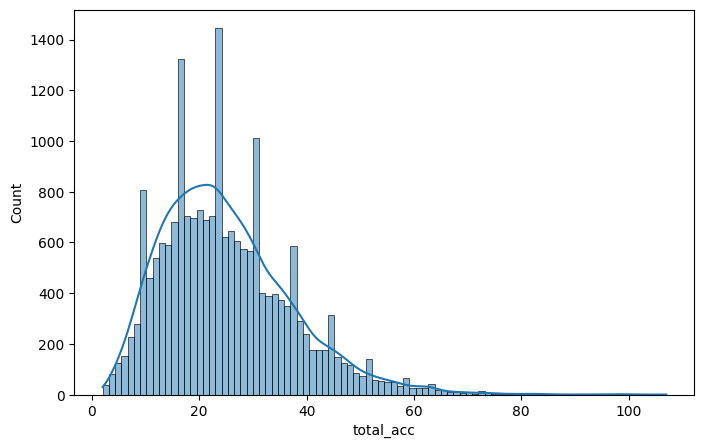

In [152]:
# Plot the histogram on the axis
plt.figure(figsize=(8,5))
sns.histplot(data=new_test_df,x='total_acc',kde=True)
plt.show()

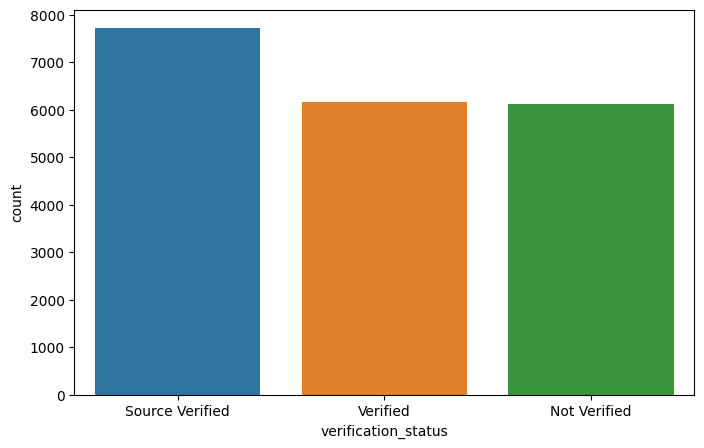

In [153]:
# Plot the countplot on the axis
plt.figure(figsize=(8,5))
# Sort the values for better interpretation
sorted_counts = test_df['verification_status'].value_counts().index
sns.countplot(data=new_test_df, x='verification_status',order=sorted_counts)
plt.show()


From exploratory data analysis, we can observe that the test dataset exhibits similar characteristics to the training dataset.

### Missing Value Treatment

In [154]:
missing_percentage = test_df.isnull().sum() / len(test_df) * 100
print(missing_percentage)

addr_state              0.000
annual_inc              0.000
earliest_cr_line        0.000
emp_length              6.290
emp_title               6.890
fico_range_high         0.000
fico_range_low          0.000
grade                   0.000
home_ownership          0.000
application_type        0.000
initial_list_status     0.000
int_rate                0.000
loan_amnt               0.000
num_actv_bc_tl          5.055
mort_acc                3.520
tot_cur_bal             5.055
open_acc                0.000
pub_rec                 0.000
pub_rec_bankruptcies    0.055
purpose                 0.000
revol_bal               0.000
revol_util              0.065
sub_grade               0.000
term                    0.000
title                   1.235
total_acc               0.000
verification_status     0.000
dtype: float64


In [155]:
new_test_df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'month', 'year', 'year_category'],
      dtype='object')

In [156]:
# Drop rows with missing values in specified columns
new_test_df.dropna(subset = ['pub_rec_bankruptcies', 'revol_util'],axis=0,inplace=True)

In [157]:
#Dropping the below features like training dataset
new_test_df.drop(['title','emp_title','emp_length'],axis=1,inplace=True)

In [158]:
#identify the numerical columns
num_cols = new_test_df._get_numeric_data().columns
num_cols

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'year'],
      dtype='object')

In [159]:
# Compute the correlation 
new_test_df[num_cols].corr()['mort_acc'].drop('mort_acc').sort_values(ascending=False)

# Mean imputation by group
# Group by 'tot_cur_bal' and calculate the mean of 'mort_acc' for each group
mort_acc_mean = new_test_df.groupby('tot_cur_bal')['mort_acc'].mean()
#Create a dictionary mapping 'tot_cur_bal' to the corresponding mean of 'mort_acc'
mort_acc_mean_dict = mort_acc_mean.to_dict()
# Fill null values in 'mort_acc' with the mean value based on 'tot_cur_bal'
new_test_df['mort_acc'] = new_test_df['mort_acc'].fillna(new_test_df['tot_cur_bal'].map(mort_acc_mean_dict))

In [160]:
# Compute the correlation 
new_test_df[num_cols].corr()['num_actv_bc_tl'].drop('num_actv_bc_tl').sort_values(ascending=False)

# Mode imputation by group
# Group by 'open_acc' and calculate the median of 'num_actv_bc_tl' for each group
num_actv_mode = new_test_df.groupby('open_acc')['num_actv_bc_tl'].median()
#Create a dictionary mapping 'open_acc' to the corresponding median of 'num_actv_bc_tl'
num_actv_mode_dict = num_actv_mode.to_dict()
# Fill null values in 'num_actv_bc_tl' with the median value based on 'open_acc'
new_test_df['num_actv_bc_tl'] = new_test_df['num_actv_bc_tl'].fillna(new_test_df['open_acc'].map(mort_acc_mean_dict))

In [161]:
# Compute the correlation 
new_test_df[num_cols].corr()['tot_cur_bal'].drop('tot_cur_bal').sort_values(ascending=False)

# Calculate the median 'tot_cur_bal' for each group of 'mort_acc'
tot_cur_bal_median = new_test_df.groupby('mort_acc')['tot_cur_bal'].median()
# Create a dictionary from the median values
tot_cur_bal_median_dict = tot_cur_bal_median.to_dict()
# Fill null values in 'tot_cur_bal' column based on 'mort_acc'
new_test_df['tot_cur_bal'] = new_test_df['tot_cur_bal'].fillna(new_test_df['mort_acc'].map(tot_cur_bal_median_dict))

In [162]:
missing_percentage = new_test_df.isnull().sum() / len(new_test_df) * 100
print(missing_percentage)

addr_state              0.000000
annual_inc              0.000000
earliest_cr_line        0.000000
fico_range_high         0.000000
fico_range_low          0.000000
grade                   0.000000
home_ownership          0.000000
application_type        0.000000
initial_list_status     0.000000
int_rate                0.000000
loan_amnt               0.000000
num_actv_bc_tl          4.780737
mort_acc                3.464157
tot_cur_bal             3.464157
open_acc                0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    0.000000
purpose                 0.000000
revol_bal               0.000000
revol_util              0.000000
sub_grade               0.000000
term                    0.000000
total_acc               0.000000
verification_status     0.000000
month                   0.000000
year                    0.000000
year_category           0.000000
dtype: float64


In [163]:
median1 = new_test_df['num_actv_bc_tl'].median()
new_test_df['num_actv_bc_tl'].fillna(median1, inplace=True)
median2 = new_test_df['mort_acc'].median()
new_test_df['mort_acc'].fillna(median2, inplace=True)
median3 = new_test_df['tot_cur_bal'].median()
new_test_df['tot_cur_bal'].fillna(median3, inplace=True)

In [164]:
missing_percentage = new_test_df.isnull().sum() / len(new_test_df) * 100
print(missing_percentage)

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
total_acc               0.0
verification_status     0.0
month                   0.0
year                    0.0
year_category           0.0
dtype: float64


Thus the null values are imputed in the same way as training dataset

In [165]:
#checking for duplicates
num_duplicates = new_test_df.duplicated().sum()
num_duplicates

0

## Feature Engineering

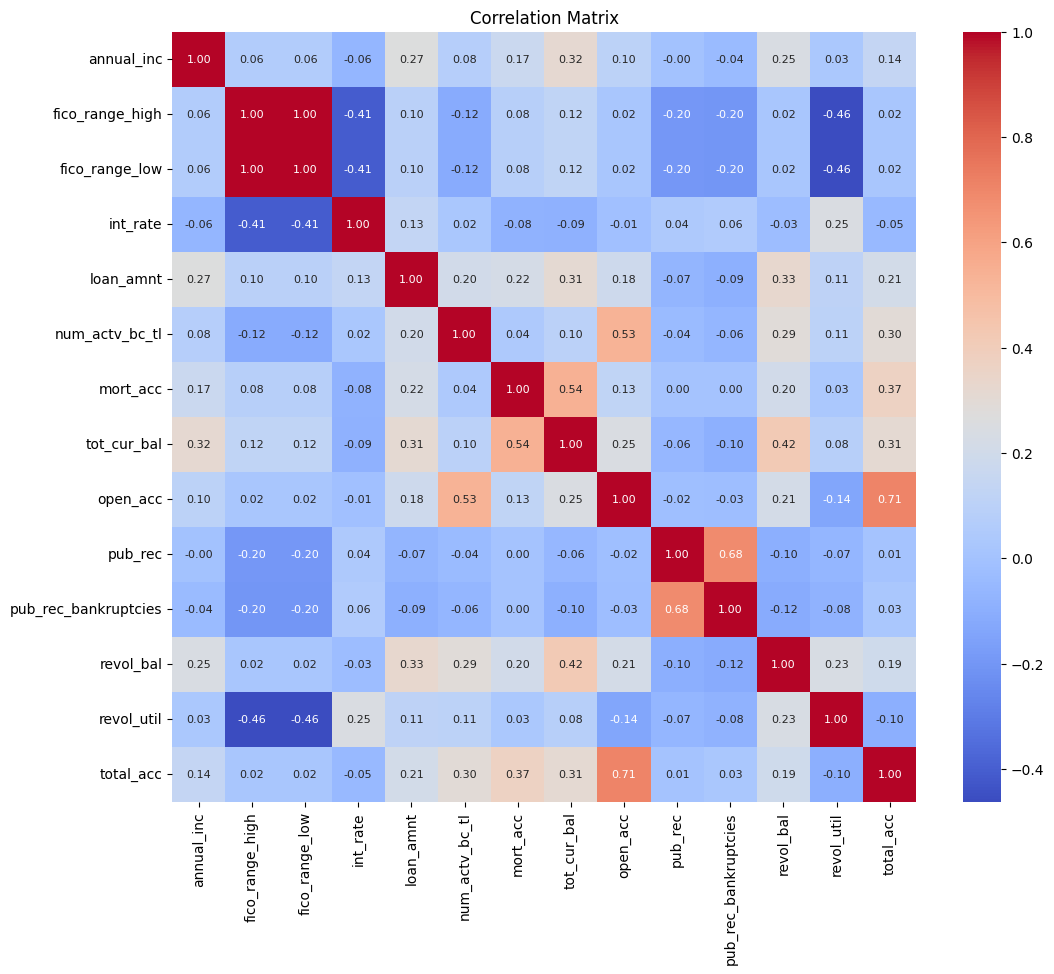

In [166]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc']
cor = new_test_df[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')
# Save the plot as PNG file
plt.savefig('correlation_matrix_test.png')
plt.show()

### Outliers Plot

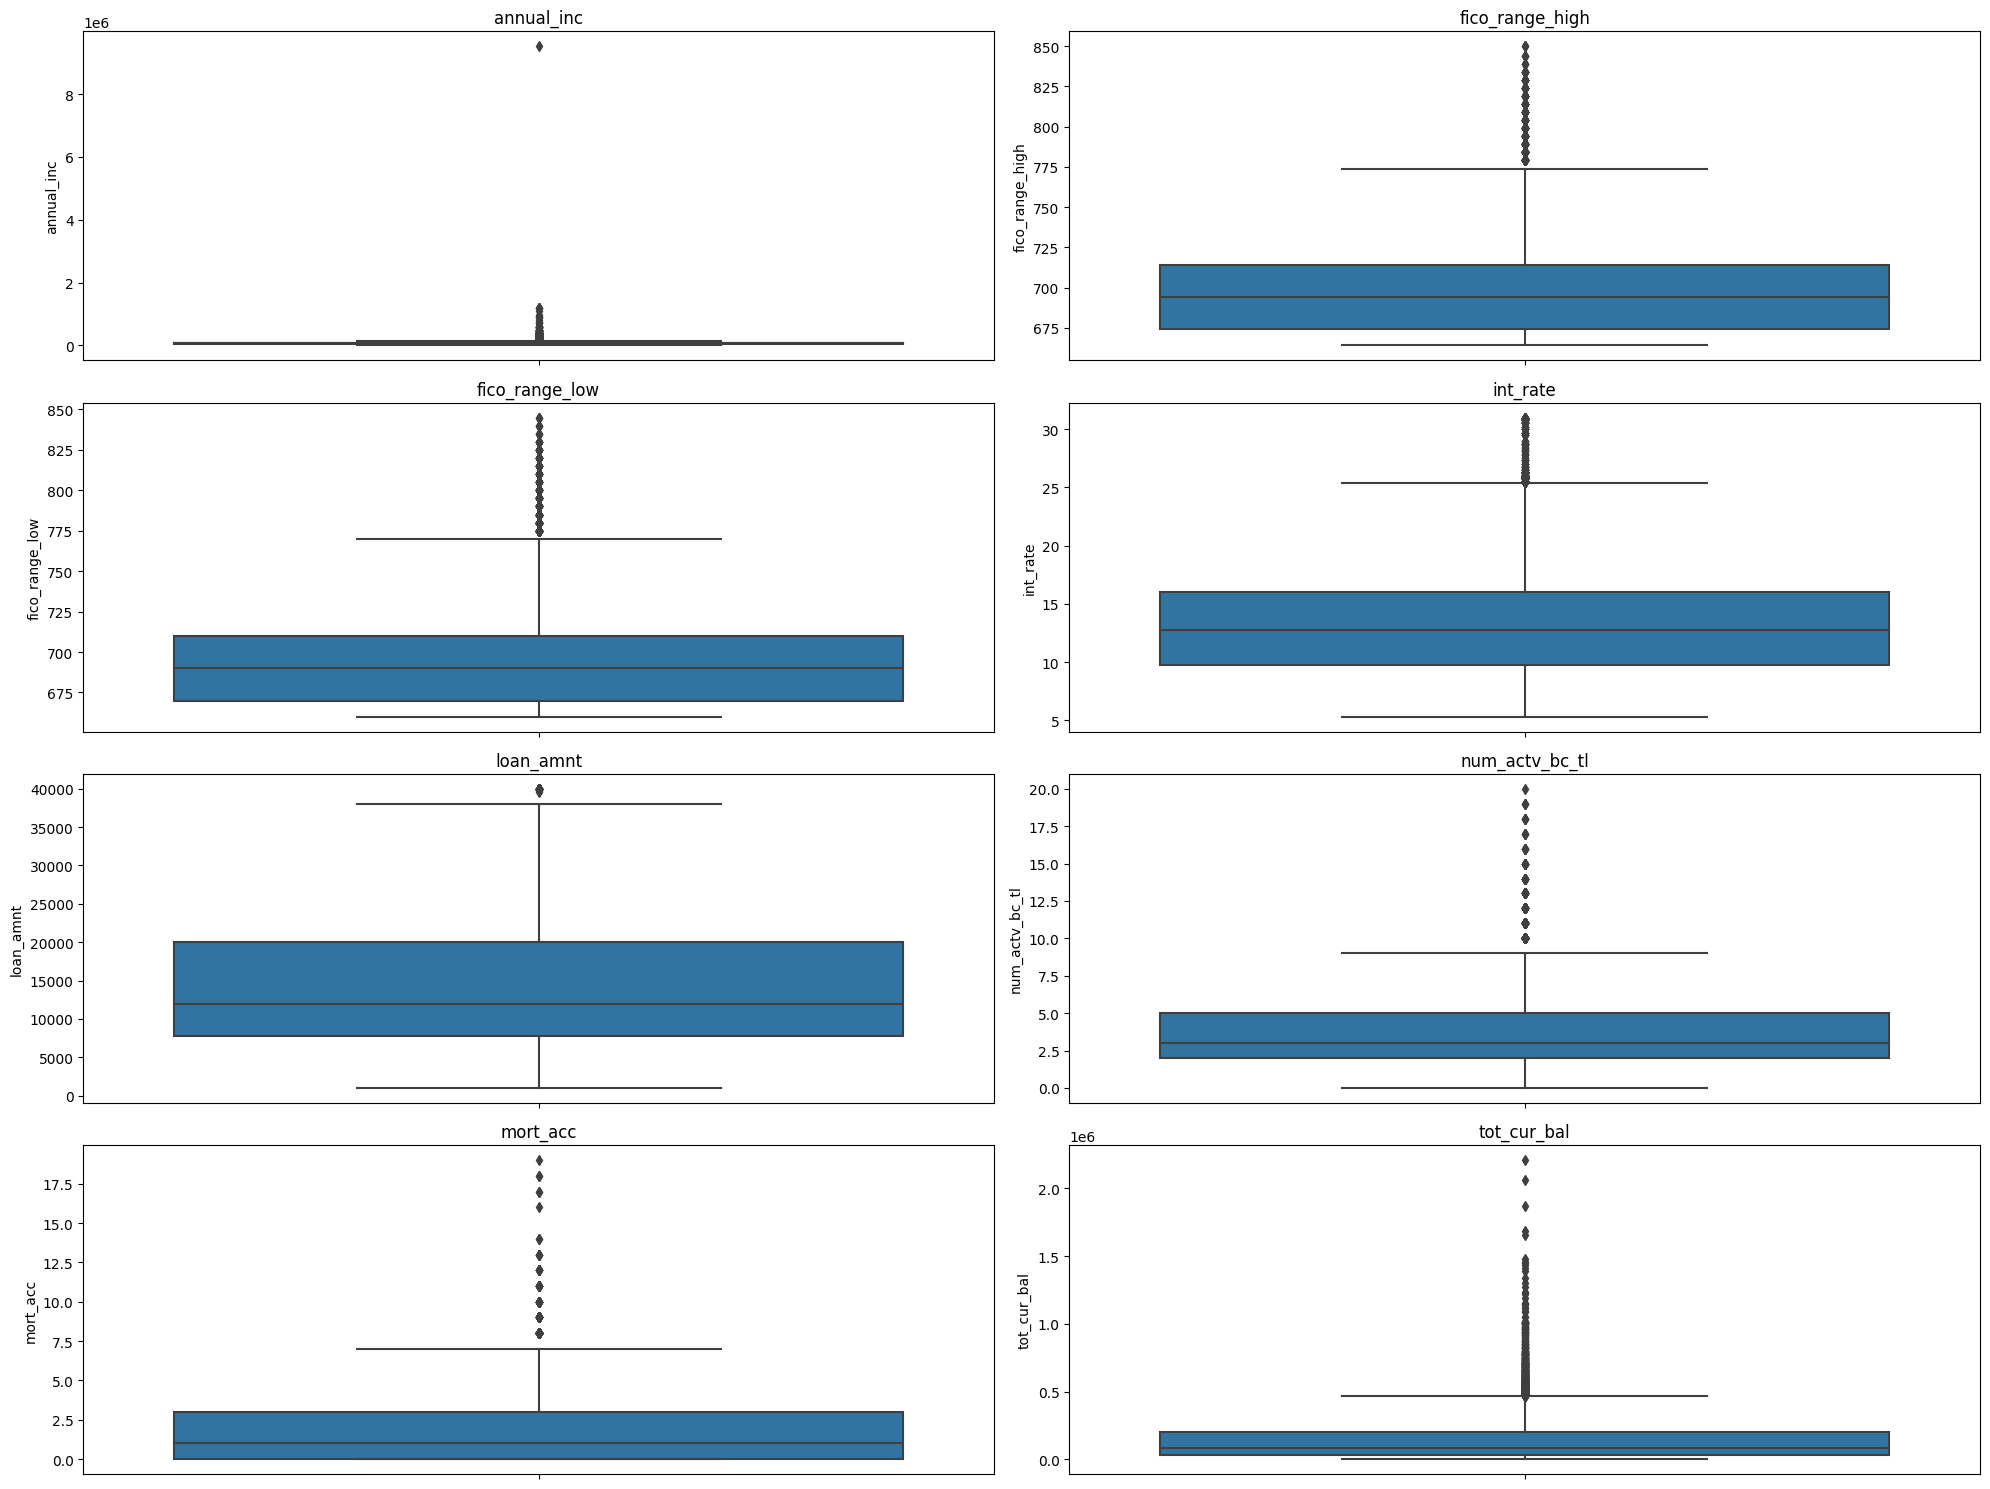

In [167]:
cols = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal']
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(20, 15))
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot
for i, col in enumerate(cols):
    sns.boxplot(data=new_test_df,y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
        
plt.tight_layout()
plt.show()

In [168]:
def outlier_removal(df,columns):
    new_df = new_test_df.copy()
    for col in columns:
        col_values = new_test_df[col].values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
        col_iqr = q75 - q25
        print('iqr: {}'.format(col_iqr))

        cut_off = col_iqr * 3
        lower_bound,upper_bound = q25 - cut_off, q75 + cut_off
        print('Cut Off: {}'.format(cut_off))
        print('Lower Bound: {}'.format(lower_bound))
        print('Upper Bound: {}'.format(upper_bound))

        outliers = [x for x in col_values if x < lower_bound or x > upper_bound]
        print(f'Feature {col} Outliers: {len(outliers)}')
        new_df = new_df.drop(new_df[(new_df[col] > upper_bound) | (new_df[col] < lower_bound)].index)
        print('----' * 30)
    return new_df

cols = ['annual_inc']
new_test_df = outlier_removal(new_test_df,cols)

Quartile 25: 45086.399999999994 | Quartile 75: 90000.0
iqr: 44913.600000000006
Cut Off: 134740.80000000002
Lower Bound: -89654.40000000002
Upper Bound: 224740.80000000002
Feature annual_inc Outliers: 330
------------------------------------------------------------------------------------------------------------------------


In [169]:
new_test_df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'verification_status', 'month',
       'year', 'year_category'],
      dtype='object')

In [170]:
new_test_df['home_ownership'].value_counts()

new_test_df['home_ownership'] = new_test_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'OTHER')

new_test_df.home_ownership.value_counts()

home_ownership
MORTGAGE    9671
RENT        7840
OWN         2133
OTHER          2
Name: count, dtype: int64

In [171]:
print(new_test_df['pub_rec'].value_counts())

# Define conditions and choices for years
conditions_pub_rec = [
    (new_test_df['pub_rec'] == 0),
    (new_test_df['pub_rec'] == 1),
    (new_test_df['pub_rec'] > 1) 
]

choices_pub_rec = ['No_derogatory_records','1_derogatory', '>1_derogatory_records']

# Create the 'year_category' column based on conditions
new_test_df['pub_rec'] = np.select(conditions_pub_rec, choices_pub_rec, default='unknown')

new_test_df['pub_rec'].value_counts()

pub_rec
0.0     16386
1.0      2762
2.0       343
3.0        87
4.0        32
5.0        21
6.0         6
7.0         5
8.0         2
12.0        1
11.0        1
Name: count, dtype: int64


pub_rec
No_derogatory_records    16386
1_derogatory              2762
>1_derogatory_records      498
Name: count, dtype: int64

In [172]:
print(new_test_df['pub_rec_bankruptcies'].value_counts())

# Define conditions and choices for years
conditions_pub_bankrupties = [
    (new_test_df['pub_rec_bankruptcies'] == 0),
    (new_test_df['pub_rec_bankruptcies'] == 1),
    (new_test_df['pub_rec_bankruptcies'] > 1) 
]

choices_pub_bankrupties = ['No_bankrupties','1_bankrupties', '>1_bankrupties']

# Create the 'pub_rec_bankruptcies' column based on conditions
new_test_df['pub_rec_bankruptcies'] = np.select(conditions_pub_bankrupties, choices_pub_bankrupties, default='unknown')
print(new_test_df['pub_rec_bankruptcies'].value_counts())

pub_rec_bankruptcies
0.0    17241
1.0     2263
2.0      113
3.0       21
4.0        4
5.0        2
8.0        1
6.0        1
Name: count, dtype: int64
pub_rec_bankruptcies
No_bankrupties    17241
1_bankrupties      2263
>1_bankrupties      142
Name: count, dtype: int64


In [173]:
#Dropping the features which is of least importance like training dataset
new_test_df.drop(['month','year'],axis= 1,inplace=True)

new_test_df.drop(['earliest_cr_line','grade'],axis= 1,inplace=True)

In [174]:
#Calculating the new feature 'fico_range'
new_test_df['fico_range'] = (new_test_df['fico_range_high'] + new_test_df['fico_range_low']) / 2

new_test_df.drop(['fico_range_high','fico_range_low'],axis= 1,inplace=True)


In [175]:
#identify the numerical columns
num_cols = new_test_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = new_test_df.drop(num_cols,axis= 1).columns
#identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_columns = binary_columns(new_test_df)
numerical_columns = [i for i in num_cols if i not in binary_columns]

print(numerical_columns)
print(categorical_columns)
print(binary_columns)

['annual_inc', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'fico_range']
Index(['addr_state', 'home_ownership', 'application_type',
       'initial_list_status', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'sub_grade', 'term', 'verification_status', 'year_category'],
      dtype='object')
[]


In [176]:
#find the skewness of the numerical features
skewness = new_test_df[numerical_columns].skew()
print(skewness)

# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)

# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    new_test_df[col] = np.log1p(new_test_df[col])


annual_inc        1.173046
int_rate          0.688107
loan_amnt         0.789748
num_actv_bc_tl    1.428454
mort_acc          1.548629
tot_cur_bal       1.955670
open_acc          1.267674
revol_bal         6.797746
revol_util       -0.071368
total_acc         0.961779
fico_range        1.286891
dtype: float64
['annual_inc', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'revol_bal', 'fico_range']


In [177]:
#identify the numerical columns
numerical_columns = new_test_df._get_numeric_data().columns
#identify the categorical columns
categorical_columns = new_test_df.drop(num_cols,axis= 1).columns

### Feature Encoding

In [178]:
# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(new_test_df[categorical_columns])
# Concatenate the original DataFrame with the encoded features along the columns axis
new_test_df = pd.concat([new_test_df, encoded_features], axis=1)
# Drop the original categorical columns if needed
new_test_df.drop(categorical_columns, axis=1, inplace=True) 

### Feature Scaling

In [179]:
def feature_scaling(dataset, num_cols):
    sc_x = StandardScaler()
    dataset[num_cols] = sc_x.fit_transform(dataset[num_cols])
    return dataset

final_test_df = feature_scaling(new_test_df, numerical_columns)

In [180]:
final_test_df.head()

,annual_inc,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,revol_bal,revol_util,total_acc,...,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,year_category_1980 -1990,year_category_1990-2000,year_category_2000-2010,year_category_2010-2020,year_category_before 1980
0,-0.418294,0.147567,-1.065027,-1.530962,-1.070675,-0.609886,-0.325128,-1.130580,-1.713849,-1.154327,...,True,False,False,True,False,False,False,False,True,False
1,0.677460,-0.481750,1.812424,-0.669878,0.550037,0.921816,0.101463,0.973992,0.969820,0.834077,...,True,False,False,True,False,False,False,True,False,False
2,0.617885,-0.657959,0.201052,0.802154,0.550037,0.734849,0.774573,1.173145,0.965729,1.331178,...,False,True,True,False,False,True,False,False,False,False
3,-1.164972,0.082538,-0.489537,1.129523,-1.070675,-0.679213,0.288745,0.668115,0.724362,-0.740076,...,True,False,True,False,False,False,False,True,False,False
4,-1.029702,0.168544,-1.180125,-0.669878,1.303624,0.435636,-0.571647,-0.874009,-0.502925,-0.491526,...,True,False,False,False,True,False,True,False,False,False


In [181]:
final_test_df.shape

(19646, 134)

### Prediction of Target using the tuned Model

In [182]:
y_predictions_test = voting_classifier_tuned.predict(final_test_df)

In [183]:
len(y_predictions_test)

19646

In [184]:
# Convert NumPy array to Pandas Series
y_pred_test = pd.Series(y_predictions_test)

y_pred_test.value_counts()

0    13182
1     6464
Name: count, dtype: int64

In [185]:
y_pred_test.value_counts(normalize=True)

0    0.670976
1    0.329024
Name: proportion, dtype: float64

In [186]:
# Define a dictionary to map values
status_mapping = {0: 'Paid', 1: 'Defaulted'}

# Replace values in the series
loan_status_test = y_pred_test.replace(status_mapping)

# Now you can use the value_counts() method
loan_status_test.value_counts()

Paid         13182
Defaulted     6464
Name: count, dtype: int64

In [187]:
loan_status_test.head()

0         Paid
1         Paid
2         Paid
3    Defaulted
4         Paid
dtype: object

In [188]:
# Convert the Series to a DataFrame
loan_status_test_df = pd.DataFrame({'loan_status': loan_status_test})

# Save the DataFrame to an Excel file
loan_status_test_df.to_excel("loan_status_test.xlsx", index=False)

In [189]:
################################################################################